# HR Employee Attrition Analysis

<b>ARISE members:</b>
1. Zulfikri Syafnur
2. Anik Maulia Tri H.
3. Jennifer Greyselda
3. Wahyu Fajrin M.

### Overview
ARISE is a long-established manufacturing company known for producing high-quality products. Currently, the company is facing a significant challenge related to a high employee attrition rate. As a response, the management has tasked the data and BI team with understanding the key factors to focus on in efforts to reduce the employee attrition rate.
1. <b>Problem:</b> At ARISE Compan, a 16% attrition rate, which is equivalent to 237 employees may lead to significant losses. This includes hiring costs, where the replacement cost per person in the United States is 4,700 USD, totaling 1,113,900 USD for the 237 employees affected by attrition. Additionally, there are opportunity costs, as employees who resign could contribute more optimally to the company. Moreover, attrition might reduce productivity by disrupting positive team relationships.
2. <b>Goals:</b> Reducing the yearly attrition rate from 16% to less than 10% and lowering costs incurred for employee recruitment, so doing will contribute to improved workforce stability and financial efficiency.
3. <b>Objective:</b> Create a classification model to predict employees prone to attrition.
4. <b>Business Metrics:</b> Attrition rate and hiring cost.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import yeojohnson

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

import re
import shap

import warnings
warnings.filterwarnings("ignore")

pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
# Check the contents of the dataset
df.sample(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
102   20       Yes  Travel_Frequently        871  Research & Development   
705   39        No      Travel_Rarely        903                   Sales   
854   45        No      Travel_Rarely       1457  Research & Development   
15    29        No      Travel_Rarely       1389  Research & Development   
711   29       Yes      Travel_Rarely        906  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
102                 6          3  Life Sciences              1   
705                 2          5  Life Sciences              1   
854                 7          3        Medical              1   
15                 21          4  Life Sciences              1   
711                10          3  Life Sciences              1   

     EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
102             137                        4  Female          66   
705             985                        1    Male          41   
854            1195                        1  Female          83   
15               20                        2  Female          51   
711             994                        4  Female          92   

     JobInvolvement  JobLevel                 JobRole  JobSatisfaction  \
102               2         1   Laboratory Technician                4   
705               4         3         Sales Executive                3   
854               3         1      Research Scientist                3   
15                4         3  Manufacturing Director                1   
711               2         1      Research Scientist                1   

    MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
102        Single           2926        19783                   1      Y   
705        Single           7880         2560                   0      Y   
854       Married           4477        20100                   4      Y   
15       Divorced           9980        10195                   1      Y   
711        Single           2404        11479                   6      Y   

    OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
102      Yes                 18                  3                         2   
705       No                 18                  3                         4   
854      Yes                 19                  3                         3   
15        No                 11                  3                         3   
711      Yes                 20                  4                         3   

     StandardHours  StockOptionLevel  TotalWorkingYears  \
102             80                 0                  1   
705             80                 0                  9   
854             80                 1                  7   
15              80                 1                 10   
711             80                 0                  3   

     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
102                      5                3               1   
705                      3                3               8   
854                      2                2               3   
15                       1                3              10   
711                      5                3               0   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
102                   0                        1                     0  
705                   7                        0                     7  
854                   2                        0                     2  
15                    9                        8                     8  
711                   0                        0                     0

### About The Dataset
The dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

#### Data Dictionary
1. Age = Employee age
2. Attrition = Employee leaving the company (No/Yes)
3. BusinessTravel = Frequency of travel for business purposes
4. DailyRate = Employee's daily income (USD)
5. Department = Department in the company
6. DistanceFromHome = Distance from work to home (km)
7. Education = Education level (1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor')
8. EducationField = Field of education
9. EmployeeCount = Number of employees
10. EmployeeNumber = Employee ID number (Unique)
11. EnvironmentSatisfaction = Employee satisfaction level with the work environment (1:'Low', 2:'Medium', 3:'High', 4:'Very High')
12. Gender = Gender (Male/Female)
13. HourlyRate = Employee's hourly income (USD)
14. JobInvolvement = Employee's level of involvement in the job (1:'Low', 2:'Medium', 3:'High', 4:'Very High')
15. JobLevel = Job level in the company (scale 1 to 5)
16. JobRole = Employee's position/job title
17. JobSatisfaction = Employee's job satisfaction level (1:'Low', 2:'Medium', 3:'High', 4:'Very High')
18. MaritalStatus = Marital status
19. MonthlyIncome = Employee's monthly income after tax deductions, allowances, or other cuts (net income)
20. MonthlyRate = Employee's monthly income before tax deductions, allowances, or other cuts (gross income)
21. NumCompaniesWorked = Number of companies where the employee has previously worked
22. Over18 = Whether the employee is over 18 years old or not
23. OverTime = Whether the employee works overtime or not (Yes/No)
24. PercentSalaryHike = Percentage increase in salary from the previous year
25. PerformanceRating = Performance rating for each employee (1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding')
26. RelationshipSatisfaction = Employee satisfaction level with their relationship with the work environment, colleagues, and supervisors in the company (1:'Low', 2:'Medium', 3:'High', 4:'Very High')
27. StandardHours = Standard working hours for employees
28. StockOptionLevel = Employee's level of participation in the company's stock option program
29. TotalWorkingYears = Total number of years of work experience for the employee from the first job until now
30. TrainingTimesLastYear = Number of training sessions attended by the employee in the previous year
31. WorkLifeBalance = Level of balance between work and personal life (1:'Bad', 2:'Good', 3:'Better', 4:'Best')
32. YearsAtCompany = Total number of years the employee has worked in the current company
33. YearsInCurrentRole = Total number of years the employee has been in the current position/role
34. YearsSinceLastPromotion = Total number of years since the employee's last promotion
35. YearsWithCurrManager = Total number of years the employee has been with the current manager

## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Check for missing values in the dataset
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Summary:**
- The dataset consists of 1470 rows and 35 columns.
- The dataset contains no missing values.
- The data types for all columns are correct, and both column names and contents are accurate.

In [8]:
# Check for duplicated data in the dataset
df.duplicated().sum()

0

**Summary:**
- The dataset contains no duplicates

### Statistical Analysis

In [5]:
# Separate categorical and numerical columns

num_cols = []
cat_cols = []

for a, i in df.items():
    if i.dtype == 'object':
        cat_cols.append(a)
    else:
        num_cols.append(a)

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### Categorical Summaries

In [7]:
df[cat_cols].describe().T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [17]:
for col in cat_cols:
    print(f'Value Counts {col} Column:')
    print(df[col].value_counts(), end='\n\n')

Value Counts Attrition Column:
No     1233
Yes     237
Name: Attrition, dtype: int64

Value Counts BusinessTravel Column:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Value Counts Department Column:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Value Counts EducationField Column:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Value Counts Gender Column:
Male      882
Female    588
Name: Gender, dtype: int64

Value Counts JobRole Column:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources  

**Summary:**
- There are 237 employees who have undergone attrition, while 1233 other employees have not.
- There are 3 categories of business travel for employees, based on the frequency of their travels, including rarely, frequently, and non-travel. The majority of employees in the company fall into the rarely-travel category.
- There are 3 departments and 9 job roles in the company, with the Research & Development department having the highest number of employees, and the Sales Executive role having the highest number of employees.
- The educational background of employees is varied and evenly distributed across different fields of study.
- 60% of employees, or 882 individuals, are male, while the remaining 40% (588 employees) are female.
- Employees in the company have diverse marital statuses, including single, married, and divorced.
- All employees are above 18 years old.
- There are 416 (28%) employees who work overtime, while the remaining 1054 (72%) do not.

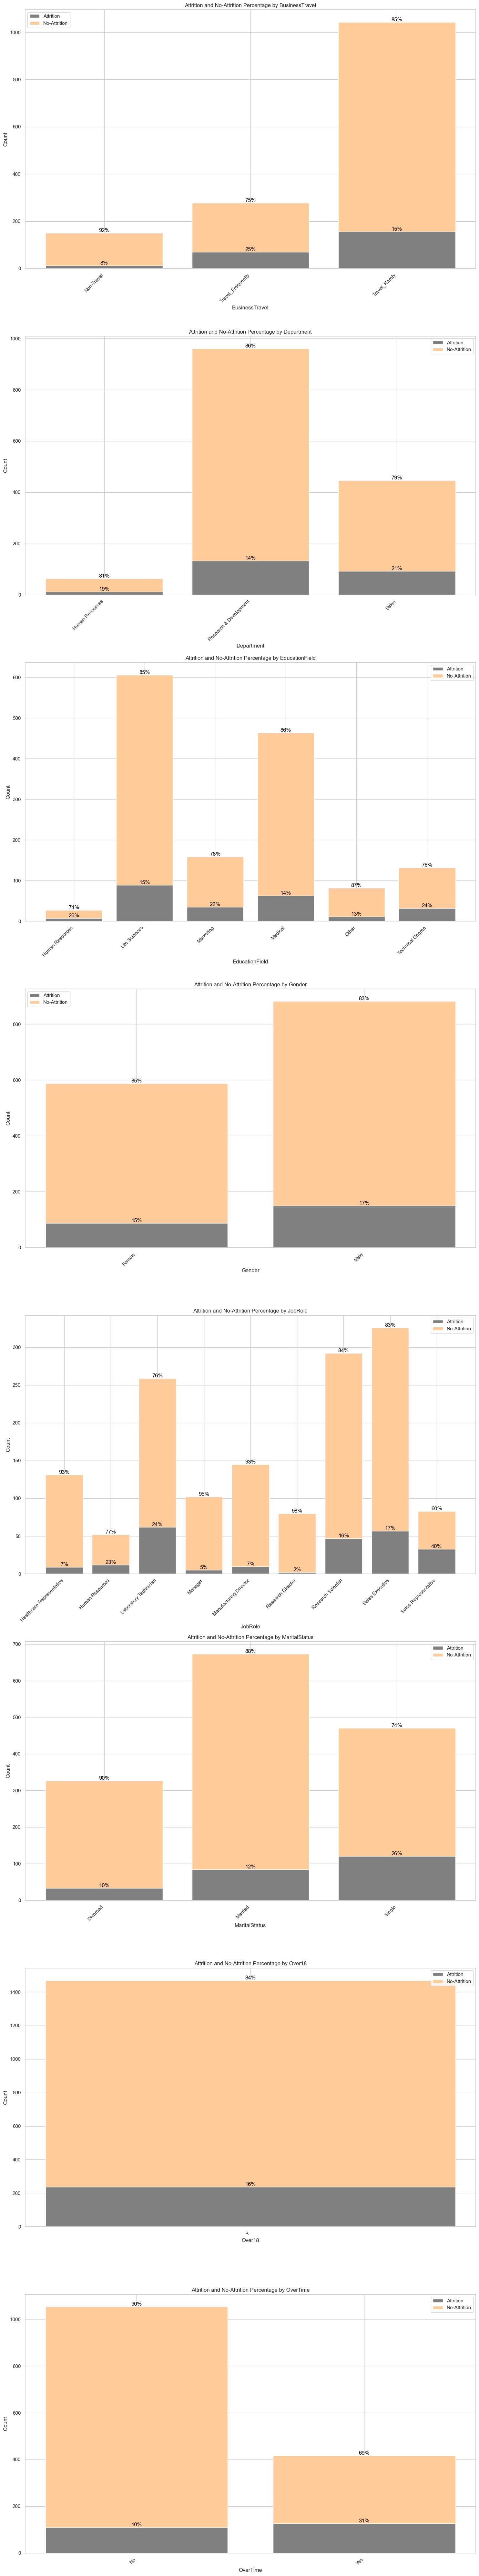

In [101]:
"""
Analysis of categorical columns involves examining the relationship between individual categorical 
features and the target variable. (Bivariate Analysis)
"""

new_cats = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

plt.figure(figsize=(15, 80))
for i in range(0, len(new_cats)):
    plt.subplot(8, 1, i + 1)
    
    count_by_cat = df[new_cats[i]].value_counts()
    
    employee_status = df.groupby([new_cats[i], 'Attrition']).size().unstack().fillna(0)
    
    employee_status['attrition_percentage'] = (employee_status['Yes'] / (employee_status['No'] + employee_status['Yes'])) * 100
    employee_status['no_attrition_percentage'] = (employee_status['No'] / (employee_status['No'] + employee_status['Yes'])) * 100
    
    plt.bar(employee_status.index, employee_status['Yes'], color='grey', label='Attrition')
    plt.bar(employee_status.index, employee_status['No'], bottom=employee_status['Yes'], color='#FFCC99', label='No-Attrition')
    
    for j, (attrition_percentage, no_attrition_percentage) in enumerate(zip(employee_status['attrition_percentage'], employee_status['no_attrition_percentage'])):
        plt.text(j, employee_status['Yes'][j], f'{attrition_percentage:.0f}%', ha='center', va='bottom', color='black')
        plt.text(j, employee_status['No'][j] + employee_status['Yes'][j], f'{no_attrition_percentage:.0f}%', ha='center', va='bottom', color='black')

    plt.xticks(range(len(employee_status.index)), employee_status.index, rotation=45, ha="right")
    plt.xlabel(new_cats[i])
    plt.ylabel('Count')
    plt.title(f'Attrition and No-Attrition Percentage by {new_cats[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

**Summary:**
- Employees who <b>frequently engage in business travel have a higher attrition rate</b> compared to those who rarely or never travel for business. It can be observed that there is a tendency for employees who engage in business travel more frequently to have a higher likelihood of attrition.
- The department with the <b>highest attrition rate is Sales</b>, followed by Human Resources, while Research & Development has the lowest.
- The <b>highest attrition rate</b> is found among employees with an <b>educational background in Human Resources.</b>
- The <b>attrition rate among male employees is higher</b> than among female employees.
- <b>Sales representatives have a relatively high attrition rate</b>, reaching 40% of the total employees with the same role.
- Employees with <b>Single marital status have a higher attrition rate</b> compared to other statuses. This may be due to the fact that individuals with a single status generally have fewer responsibilities such as a partner or children.
- 16% of employees above 18 years old experience attrition.
- <b>Overtime is a significant factor influencing employee attrition decisions</b>, with 31% of total employees who work overtime resigning.

#### Numerical Summaries

In [11]:
df[num_cols].describe().T

count     mean     std     min     25%      50%  \
Age                      1470.00    36.92    9.14   18.00   30.00    36.00   
DailyRate                1470.00   802.49  403.51  102.00  465.00   802.00   
DistanceFromHome         1470.00     9.19    8.11    1.00    2.00     7.00   
Education                1470.00     2.91    1.02    1.00    2.00     3.00   
EmployeeCount            1470.00     1.00    0.00    1.00    1.00     1.00   
EmployeeNumber           1470.00  1024.87  602.02    1.00  491.25  1020.50   
EnvironmentSatisfaction  1470.00     2.72    1.09    1.00    2.00     3.00   
HourlyRate               1470.00    65.89   20.33   30.00   48.00    66.00   
JobInvolvement           1470.00     2.73    0.71    1.00    2.00     3.00   
JobLevel                 1470.00     2.06    1.11    1.00    1.00     2.00   
JobSatisfaction          1470.00     2.73    1.10    1.00    2.00     3.00   
MonthlyIncome            1470.00  6502.93 4707.96 1009.00 2911.00  4919.00   
MonthlyRate              1470.00 14313.10 7117.79 2094.00 8047.00 14235.50   
NumCompaniesWorked       1470.00     2.69    2.50    0.00    1.00     2.00   
PercentSalaryHike        1470.00    15.21    3.66   11.00   12.00    14.00   
PerformanceRating        1470.00     3.15    0.36    3.00    3.00     3.00   
RelationshipSatisfaction 1470.00     2.71    1.08    1.00    2.00     3.00   
StandardHours            1470.00    80.00    0.00   80.00   80.00    80.00   
StockOptionLevel         1470.00     0.79    0.85    0.00    0.00     1.00   
TotalWorkingYears        1470.00    11.28    7.78    0.00    6.00    10.00   
TrainingTimesLastYear    1470.00     2.80    1.29    0.00    2.00     3.00   
WorkLifeBalance          1470.00     2.76    0.71    1.00    2.00     3.00   
YearsAtCompany           1470.00     7.01    6.13    0.00    3.00     5.00   
YearsInCurrentRole       1470.00     4.23    3.62    0.00    2.00     3.00   
YearsSinceLastPromotion  1470.00     2.19    3.22    0.00    0.00     1.00   
YearsWithCurrManager     1470.00     4.12    3.57    0.00    2.00     3.00   

                              75%      max  
Age                         43.00    60.00  
DailyRate                 1157.00  1499.00  
DistanceFromHome            14.00    29.00  
Education                    4.00     5.00  
EmployeeCount                1.00     1.00  
EmployeeNumber            1555.75  2068.00  
EnvironmentSatisfaction      4.00     4.00  
HourlyRate                  83.75   100.00  
JobInvolvement               3.00     4.00  
JobLevel                     3.00     5.00  
JobSatisfaction              4.00     4.00  
MonthlyIncome             8379.00 19999.00  
MonthlyRate              20461.50 26999.00  
NumCompaniesWorked           4.00     9.00  
PercentSalaryHike           18.00    25.00  
PerformanceRating            3.00     4.00  
RelationshipSatisfaction     4.00     4.00  
StandardHours               80.00    80.00  
StockOptionLevel             1.00     3.00  
TotalWorkingYears           15.00    40.00  
TrainingTimesLastYear        3.00     6.00  
WorkLifeBalance              3.00     4.00  
YearsAtCompany               9.00    40.00  
YearsInCurrentRole           7.00    18.00  
YearsSinceLastPromotion      3.00    15.00  
YearsWithCurrManager         7.00    17.00

**Summary:**
- Employees working in the company have an average age of 36 years, indicating a workforce with significant work experience, typically not comprising fresh graduates. This is further supported by the average `TotalWorkingYears` ranging between 10-11 years.
- Employee's daily income varies between 102-1499 USD, with hourly income ranging from 30-100 USD.
- The distance from employees' homes varies from 1-29 KM.
- On average, employees in the company hold a bachelor's degree, suggesting a high level of expertise in their respective fields. This is substantiated by the data indicating that 75% of employees have worked for 2 years or more in their fields.
- Employees in the company generally express satisfaction with their work, leading to a tendency for good performance.
- The average salary for employees in the company is 4919 USD. This salary reflects an average increase of 14% from the previous year.
- The number of companies where employees have previously worked ranges from 0-9.
- Despite the average tenure of new employees being relatively short (<5 years), there are also senior employees who have been with the company for up to 40 years.
- The average time between promotions in the company is relatively quick, typically 1-2 years.

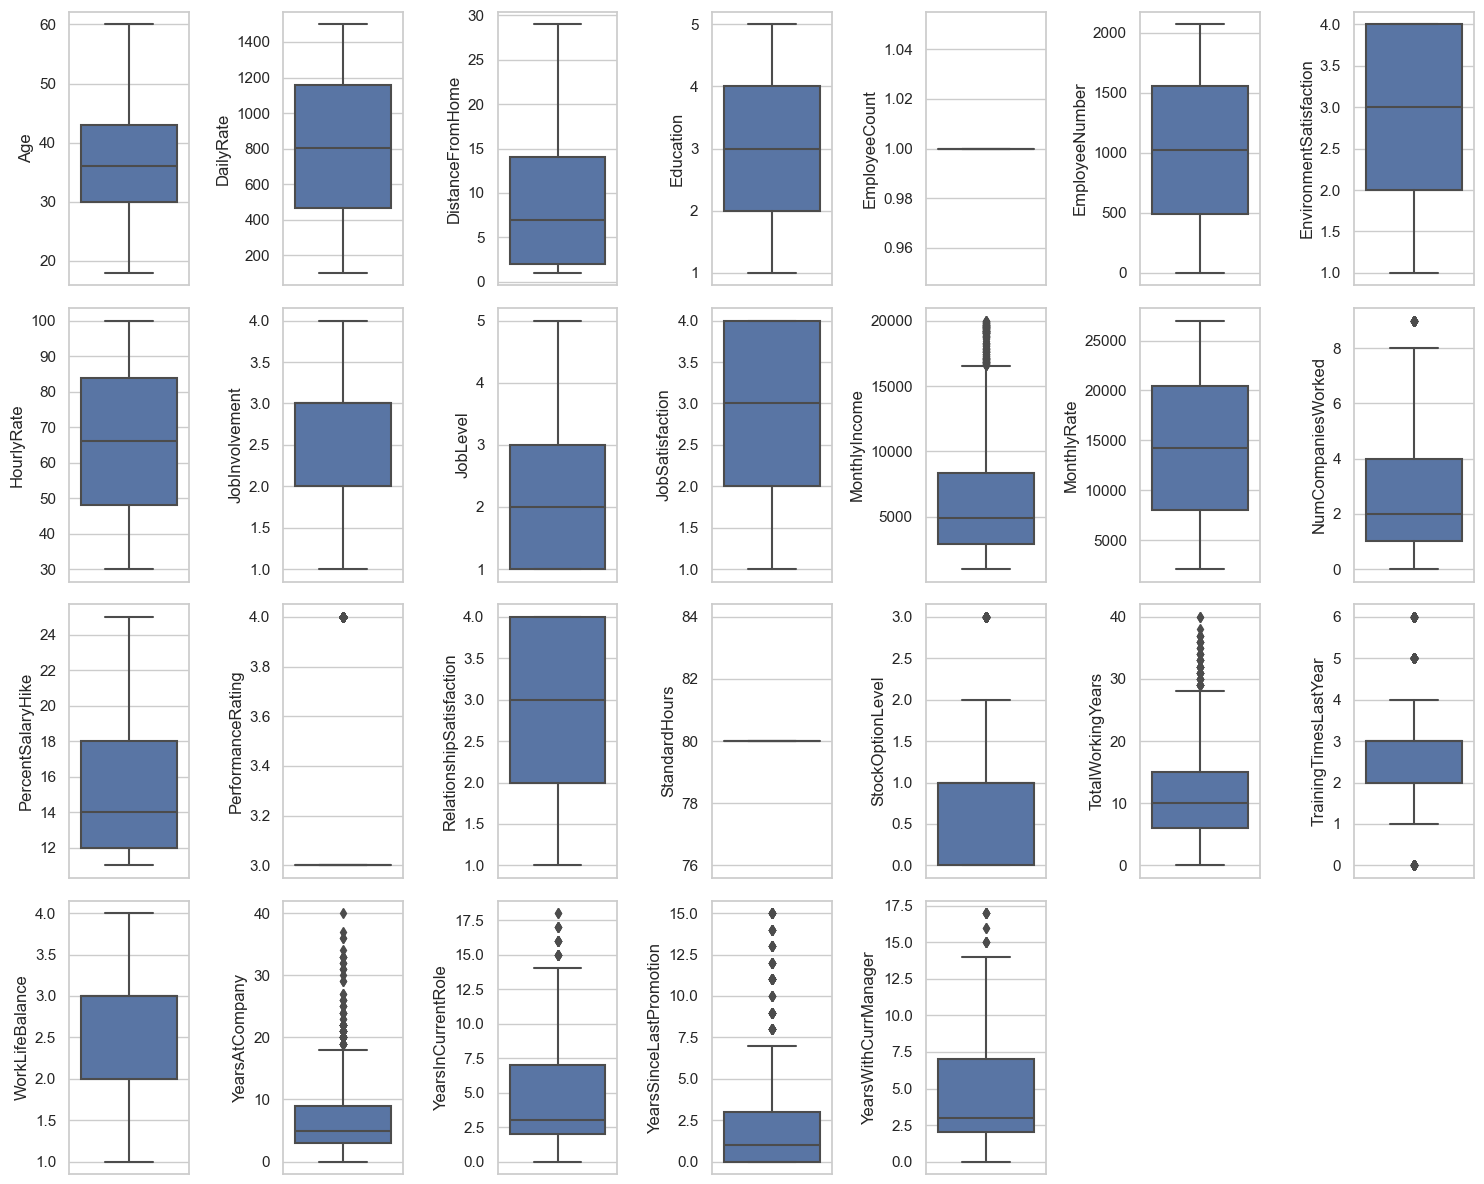

In [14]:
plt.figure(figsize=(15, 12))
for i in range(0, len(num_cols)):
    plt.subplot(4, 7, i+1)
    sns.boxplot(y=df[num_cols[i]], orient='v')
    plt.tight_layout()

**Summary:**
Outliers have been identified in the columns MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager.

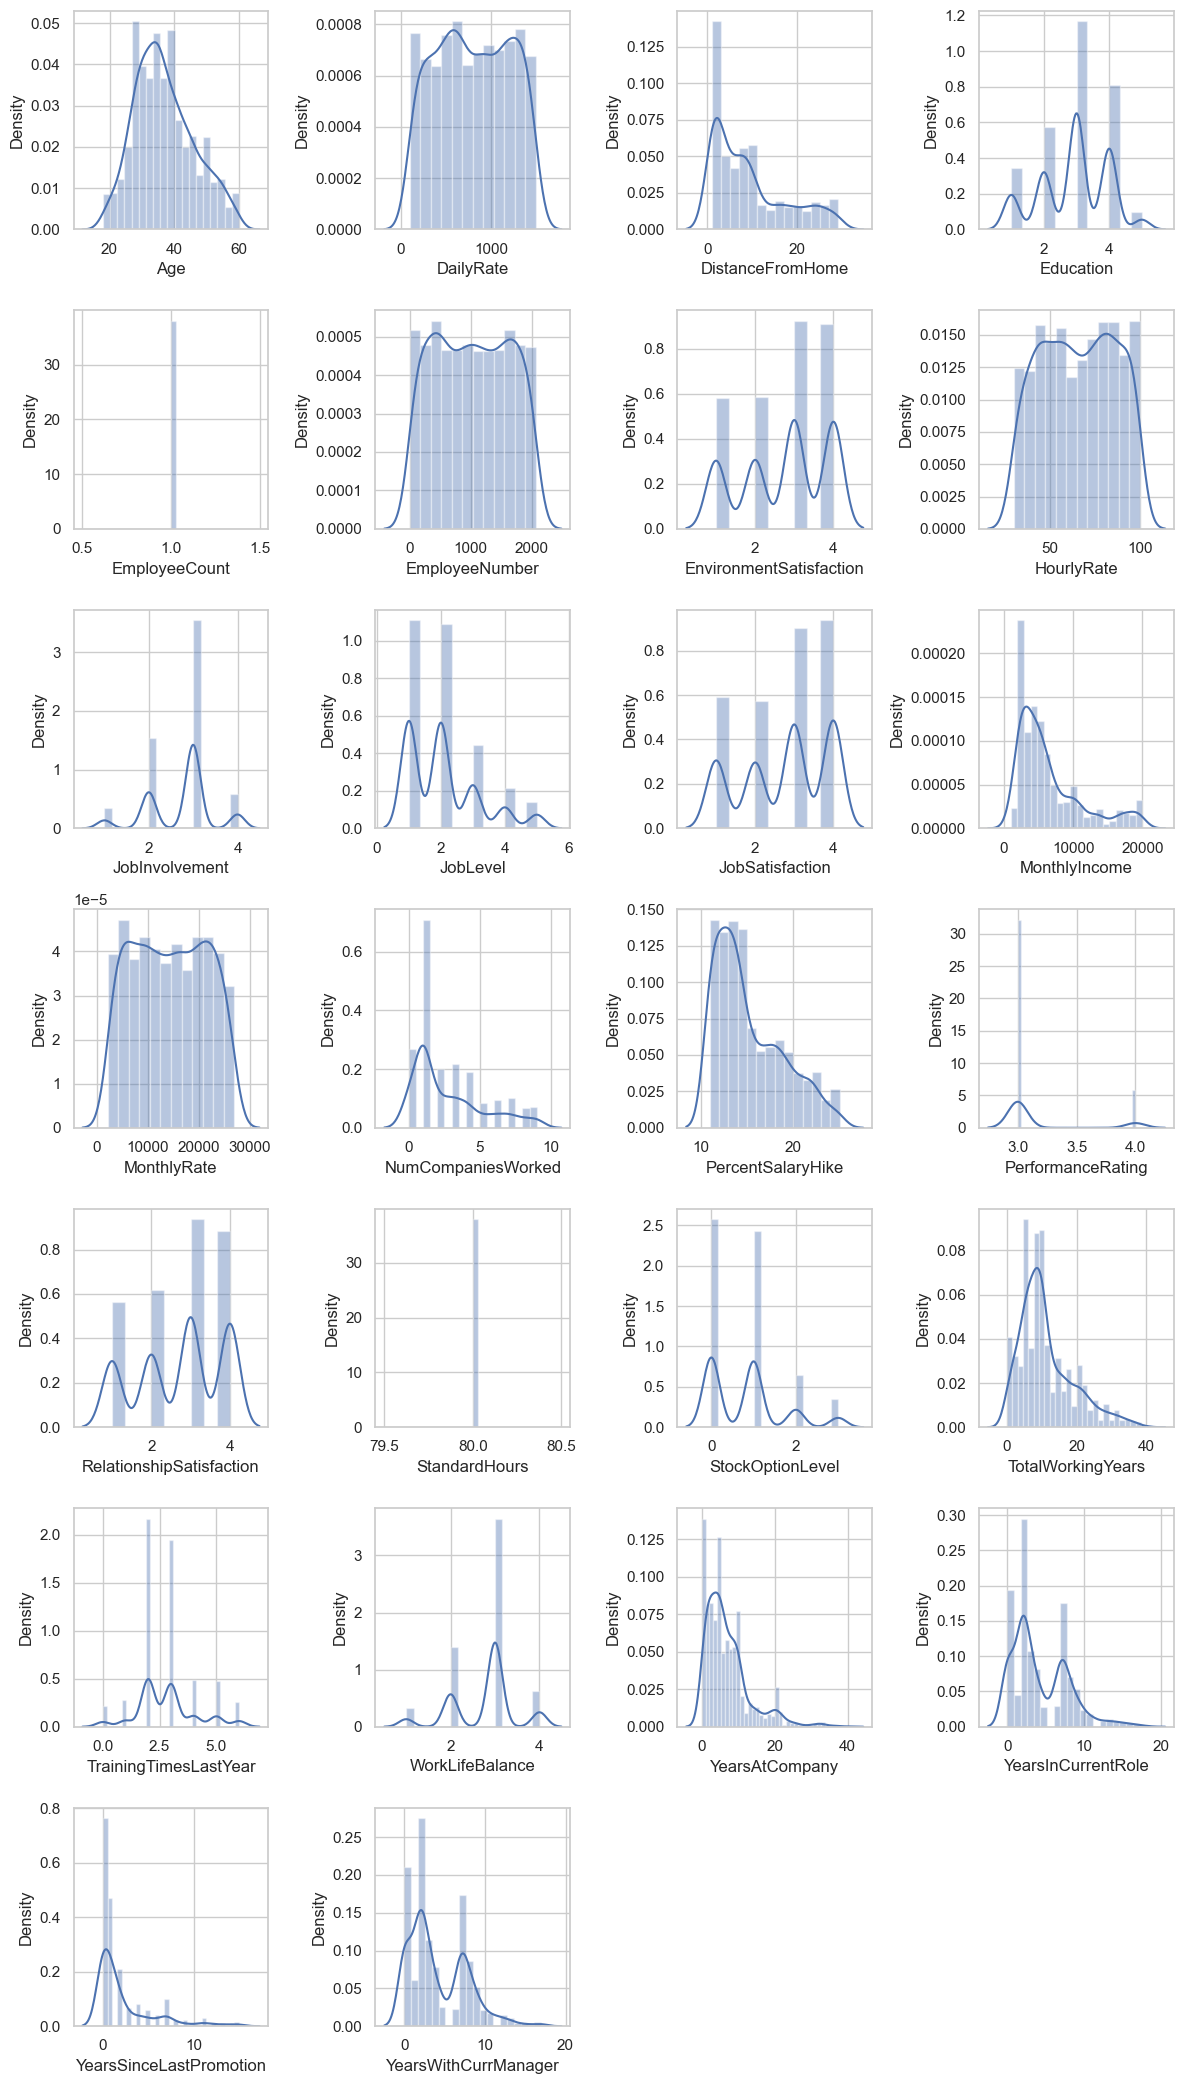

In [15]:
plt.figure(figsize=(12, 21))
for i in range(0, len(num_cols)):
    plt.subplot(7, 4, i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()

**Summary:**
- Normal Distribution: EmployeeNumber.
- Positive Skewed: Age, DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion.
- Bimodal Distribution: DailyRate, HourlyRate, MonthlyRate, PerformanceRating, TrainingTimesLastYear, YearsInCurrentRole.
- Multimodal Distribution: Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance, YearsWithCurrManager. 
- Uniform Distribution: EmployeeCount, StandardHours.

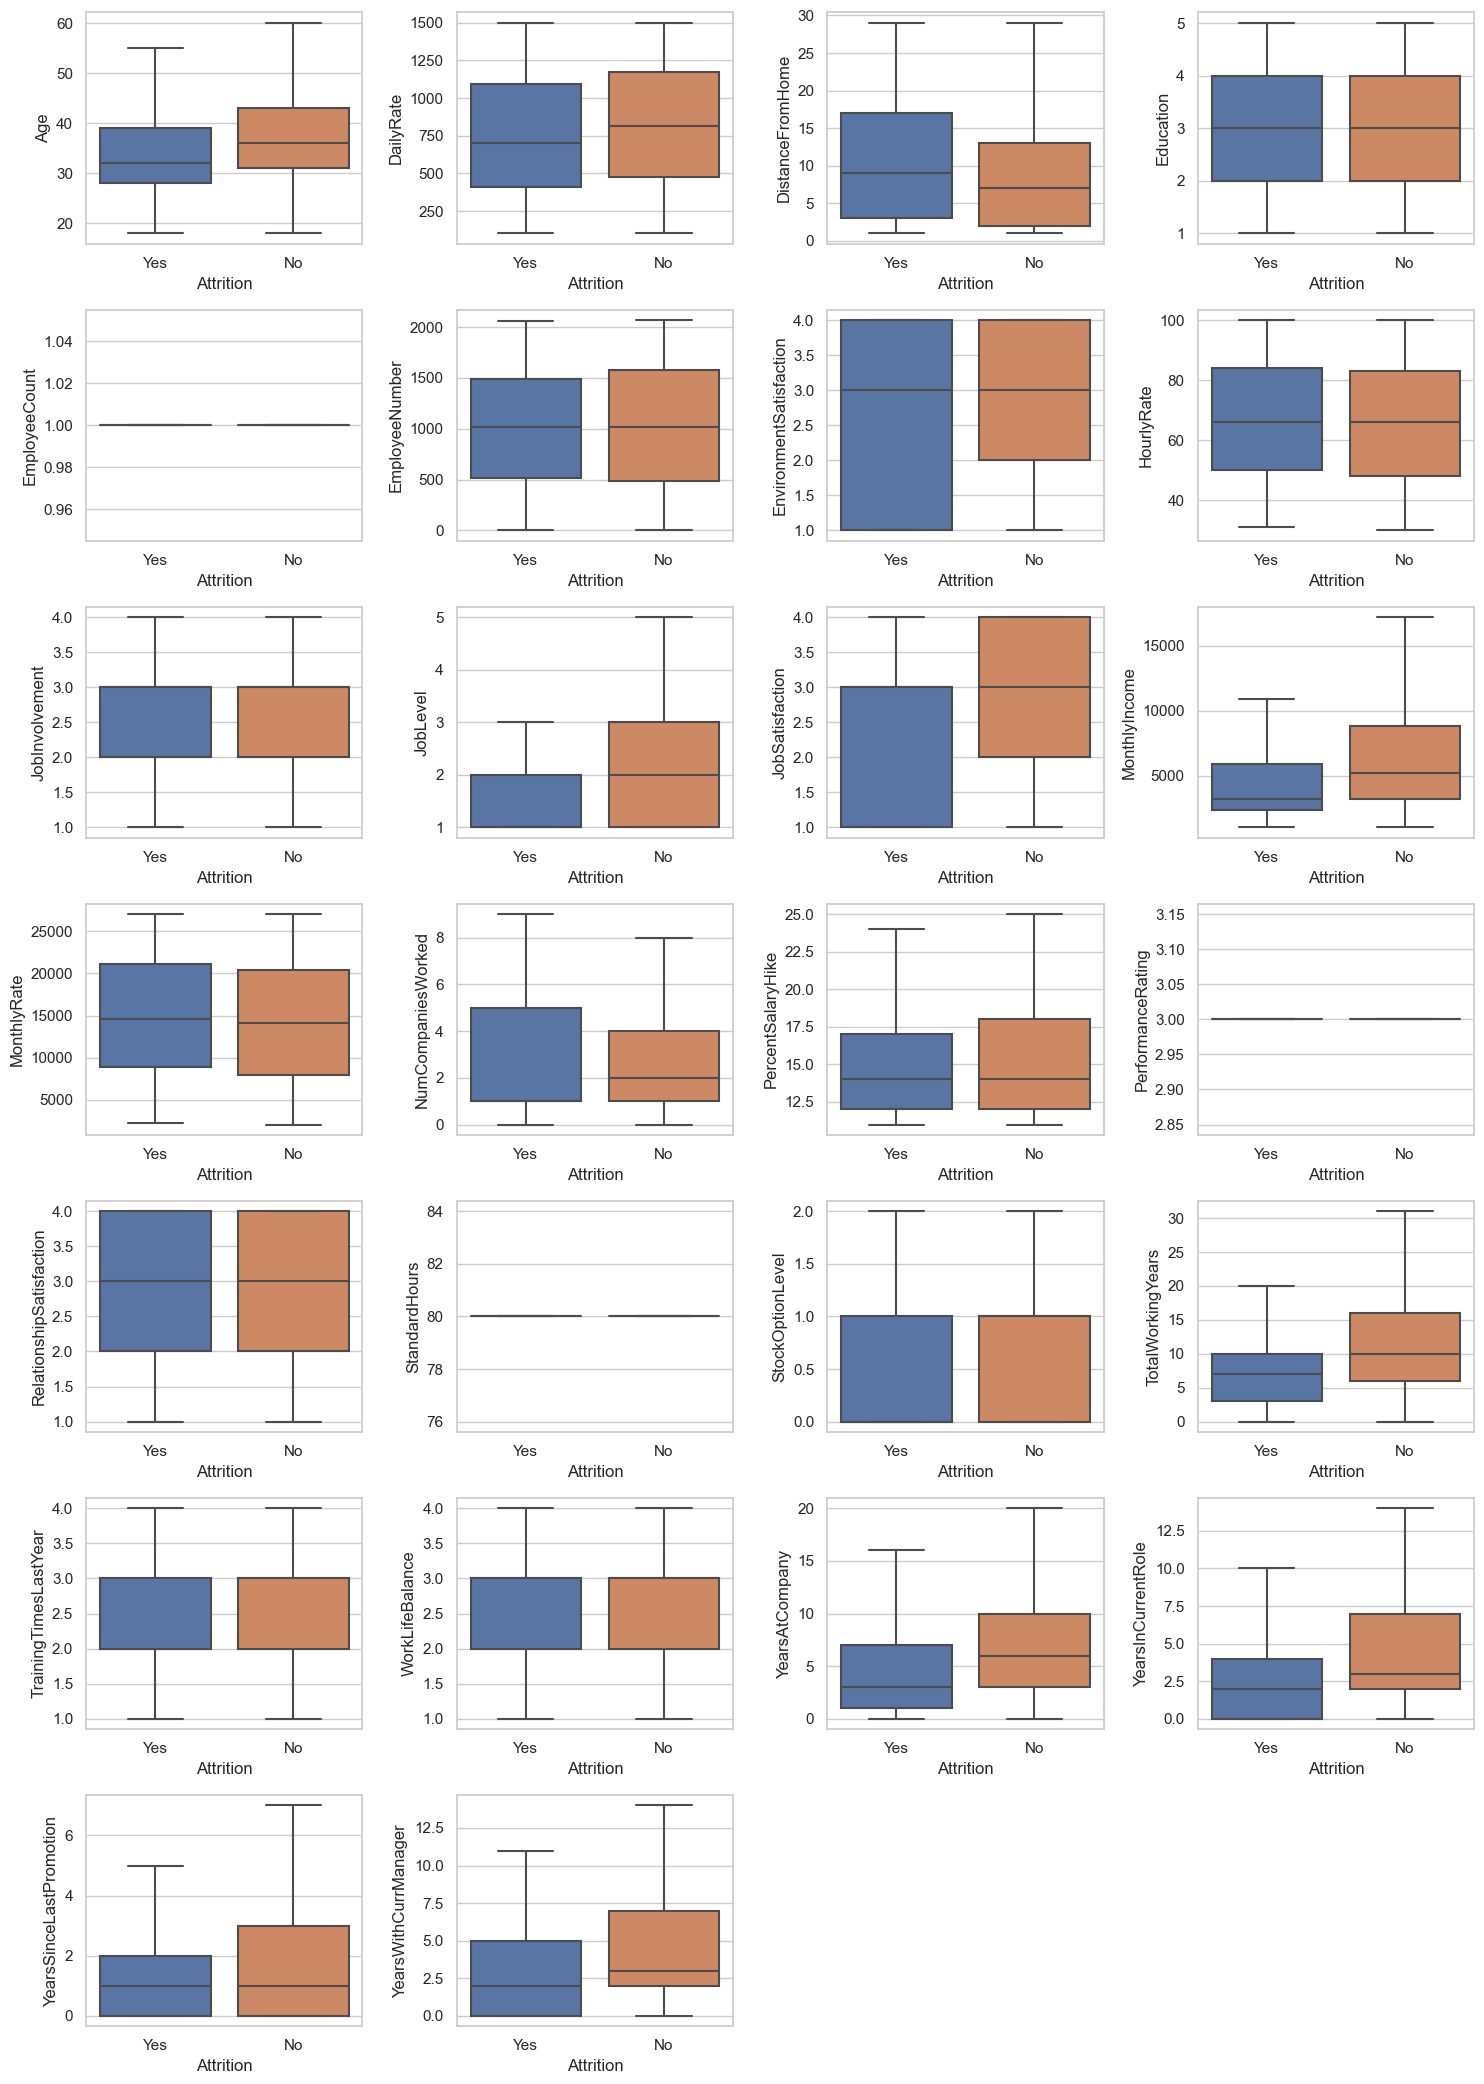

In [17]:
"""
Analysis of numerical columns involves examining the relationship between individual categorical 
features and the target variable. (Bivariate Analysis)
"""

plt.figure(figsize=(15, 21))
for i in range(0, len(num_cols)):
    plt.subplot(7, 4, i+1)
    sns.boxplot(y = df[num_cols[i]], x = df['Attrition'], orient='v', showfliers = False)
    plt.tight_layout()

**Summary:**
- Younger individuals are more prone to attrition.
- Longer commute distances are associated with higher attrition rates.
- Lower satisfaction levels towards the work environment are linked to attrition.
- Lower job levels in the company correlate with a higher likelihood of attrition.
- Lower monthly income is a contributing factor to attrition.
- A higher number of previous companies in the record is indicative of a tendency towards attrition, possibly reflecting a pattern of frequent job changes.
- A lower percent salary hike is associated with an increased likelihood of attrition.
- Shorter total working years are a predictor of attrition.
- Employees with shorter tenures in the company and current roles are more prone to attrition.
- Recent promotions are linked to a higher likelihood of attrition.
- A shorter duration of working with the current manager is associated with attrition.

### Business Insight

#### Employee Attrition Based on `BusinessTravel`, `JobRole`, `JobLevel`, and `MonthlyIncome`

In [104]:
import plotly.express as px

atr_freq = df[(df['BusinessTravel'] == 'Travel_Frequently') & (df['Attrition'] == 'Yes')]
atr_freq = atr_freq.groupby(['JobRole', 'JobLevel']).size().reset_index(name='TotalEmployee')

fig = px.sunburst(atr_freq, path=['JobRole', 'JobLevel'], values='TotalEmployee')
fig.update_layout(title='Attrition by JobRole and JobLevel', margin=dict(t=50, l=0, r=0, b=0))
fig.show()

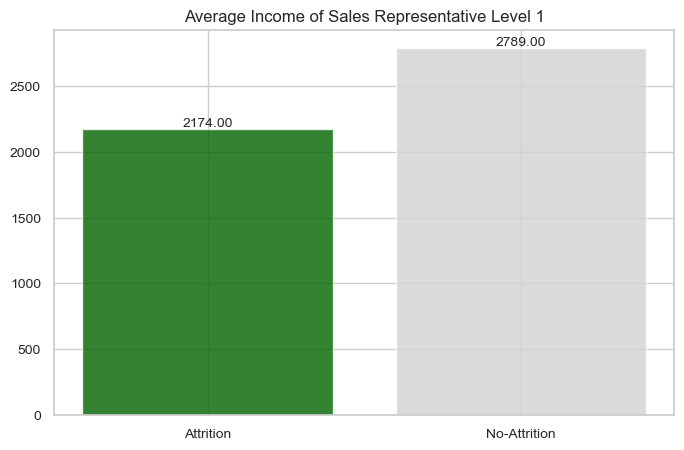

In [124]:
plt.figure(figsize=(8, 5))

atr_freq1 = df[(df['BusinessTravel'] == 'Travel_Frequently') & (df['JobRole'] == 'Sales Representative') & (df['JobLevel'] == 1)]
no_attrition = atr_freq1[atr_freq1['Attrition'] == 'No']
attrition = atr_freq1[atr_freq1['Attrition'] == 'Yes']

bar_width = 0.1
index = [0, 1]
plt.bar(index, [attrition['MonthlyIncome'].median(), no_attrition['MonthlyIncome'].median()],
        color=['#006400', 'lightgrey'], alpha=0.8, label='Median Monthly Income')

for i, label in zip(index, [attrition['MonthlyIncome'].median(), no_attrition['MonthlyIncome'].median()]):
    plt.text(i, label, f'{label:.2f}', ha='center', va='bottom', fontsize=10)

#plt.ylabel('Amount Income', fontsize=12)
plt.title('Average Income of Sales Representative Level 1')
plt.xticks(index, ['Attrition', 'No-Attrition'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
Employees who frequently undertake business travel and tend to experience the highest attrition are from the Sales Representative Level 1 role. The cause of this attrition is influenced by monthly income factors, where it can be observed that there is an average monthly income difference of `615 USD` between employees who experience attrition and those who do not, in the same role and level, and often undertake business travel. Therefore, a recommendation for the company could be a reconsideration of the monthly income received by Sales Representative Level 1 employees to determine whether it is appropriate or not, with a focus on enhancing retention.

#### Employee Attrition Based on `MaritalStatus`, `Gender`, `OverTime`, and `DistanceFromHome`

In [129]:
atr_single = df[(df['MaritalStatus'] == 'Single') & (df['Attrition'] == 'Yes')]
atr_single = atr_single.groupby(['Gender', 'OverTime']).size().reset_index(name='TotalEmployee')

fig = px.sunburst(atr_single, path=['Gender', 'OverTime'], values='TotalEmployee')
fig.update_layout(title='Attrition by OverTime and Gender', margin=dict(t=50, l=0, r=0, b=0))
fig.show()

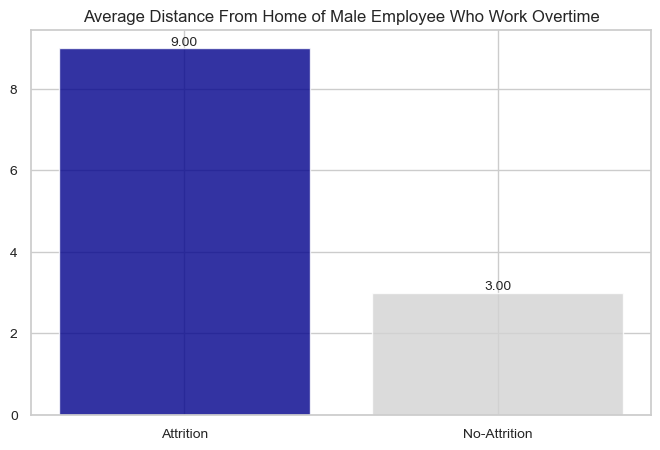

In [131]:
plt.figure(figsize=(8, 5))

atr_single1 = df[(df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male') & (df['OverTime'] == 'Yes')]
no_attrition = atr_single1[atr_single1['Attrition'] == 'No']
attrition = atr_single1[atr_single1['Attrition'] == 'Yes']

bar_width = 0.1
index = [0, 1]
plt.bar(index, [attrition['DistanceFromHome'].median(), no_attrition['DistanceFromHome'].median()],
        color=['darkblue', 'lightgrey'], alpha=0.8, label='Median Distance From Home')

for i, label in zip(index, [attrition['DistanceFromHome'].median(), no_attrition['DistanceFromHome'].median()]):
    plt.text(i, label, f'{label:.2f}', ha='center', va='bottom', fontsize=10)

#plt.ylabel('Amount Income', fontsize=12)
plt.title('Average Distance From Home of Male Employee Who Work Overtime')
plt.xticks(index, ['Attrition', 'No-Attrition'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
Employees who are Single and tend to experience the highest attrition are predominantly male and often work overtime. The cause of this attrition is influenced by the commuting distance factor, where it can be observed that among single male employees who engage in attrition and those who do not, there is an average difference in commuting distance of 6 KM. Therefore, a recommendation for the company could be a reconsideration of employee working hours, potentially setting a maximum overtime limit, for example, not exceeding 80 hours per week, or providing additional compensation if employees work more than 80 hours per week, with a focus on enhancing retention.

## Data Preprocessing

### Data Splitting
Data splitting is performed before other preprocessing to avoid leakage between the data used for building the model (training data) and the data used to validate the model (validation data). Data splitting is done with an <b>80:20</b> ratio between training data and validation data due to limitations in the data volume, maximizing its use in constructing the model.

In [3]:
df_train, df_val = train_test_split(df, test_size=0.2, stratify=df[['Attrition']], random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_val.shape)

(1176, 35)
(294, 35)


In [4]:
df_test = df.copy()

### Handling Missing Values

In [134]:
# Check for null values in the training dataset
null_counts = df_train.isnull().sum()
if null_counts[null_counts > 0].empty:
    print("There are no null values in the training dataset.")
else:
    print("Columns with null values and their counts:")
    print(null_counts[null_counts > 0])

There are no null values in the training dataset.


In [135]:
# Check for null values in the validating dataset
null_counts = df_val.isnull().sum()
if null_counts[null_counts > 0].empty:
    print("There are no null values in the validating dataset.")
else:
    print("Columns with null values and their counts:")
    print(null_counts[null_counts > 0])

There are no null values in the validating dataset.


In [136]:
# Check for null values in the testing dataset
null_counts = df_test.isnull().sum()
if null_counts[null_counts > 0].empty:
    print("There are no null values in the testing dataset.")
else:
    print("Columns with null values and their counts:")
    print(null_counts[null_counts > 0])

There are no null values in the testing dataset.


**Summary:**
The datasets contain no missing values, so there is no need to handle missing values.

### Handling Duplicated Values

In [137]:
# Handling duplicated values in the training dataset
# print("Number of rows before removing duplicates:", len(df_train))
# print("Number of rows after removing duplicates:", len(df_train.drop_duplicates()))

Number of rows before removing duplicates: 1176
Number of rows after removing duplicates: 1176


In [138]:
# Handling duplicated values in the validating dataset
# print("Number of rows before removing duplicates:", len(df_val))
# print("Number of rows after removing duplicates:", len(df_val.drop_duplicates()))

Number of rows before removing duplicates: 294
Number of rows after removing duplicates: 294


In [139]:
# Handling duplicated values in the testing dataset
# print("Number of rows before removing duplicates:", len(df_test))
# print("Number of rows after removing duplicates:", len(df_test.drop_duplicates()))

Number of rows before removing duplicates: 1470
Number of rows after removing duplicates: 1470


**Summary:**
The datasets contain no duplicates, so there is no need to handle duplicated values.

### Handle Invalid Values

In [6]:
# Check unique values in categorical columns

for x in df[cat_cols].columns :
    uniq = list(df[x].unique())
    uniq.sort()

    print (f'Column {x}:')
    if len(uniq) > 0:
        unq = list(uniq[:])
        print (f'{uniq}')
    else:
        print (f'{uniq}')
    print("--" * 50, end='\n\n')

Column Attrition:
['No', 'Yes']
----------------------------------------------------------------------------------------------------

Column BusinessTravel:
['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
----------------------------------------------------------------------------------------------------

Column Department:
['Human Resources', 'Research & Development', 'Sales']
----------------------------------------------------------------------------------------------------

Column EducationField:
['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
----------------------------------------------------------------------------------------------------

Column Gender:
['Female', 'Male']
----------------------------------------------------------------------------------------------------

Column JobRole:
['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Sci

**Summary:**
The datasets contains no invalid values.

### Feature Extraction

1. <b>AverageSatisfaction</b> column, which represents average satisfaction level of employees towards the company.

In [7]:
df_train['AverageSatisfaction'] = round((df_train['EnvironmentSatisfaction'] + df_train['JobSatisfaction'] + df_train['RelationshipSatisfaction']) / 3, 2)
df_val['AverageSatisfaction'] = round((df_val['EnvironmentSatisfaction'] + df_val['JobSatisfaction'] + df_val['RelationshipSatisfaction']) / 3, 2)
df_test['AverageSatisfaction'] = round((df_test['EnvironmentSatisfaction'] + df_test['JobSatisfaction'] + df_test['RelationshipSatisfaction']) / 3, 2)

2. <b>AverageTenurePerCompany</b> column, which represents the average duration of employment for employees at each previous company.

In [8]:
df_train['AverageTenurePerCompany'] = round(df_train['TotalWorkingYears'] / (df_train['NumCompaniesWorked'] + 1), 2)
df_val['AverageTenurePerCompany'] = round(df_val['TotalWorkingYears'] / (df_val['NumCompaniesWorked'] + 1), 2)
df_test['AverageTenurePerCompany'] = round(df_test['TotalWorkingYears'] / (df_test['NumCompaniesWorked'] + 1), 2)

3. <b>ExperienceSalaryRatio</b> column, which represents the ratio of experience to salary for each employee in this company.

In [9]:
df_train['ExperienceSalaryRatio'] = round(df_train['YearsAtCompany'] / df_train['PercentSalaryHike'], 2)
df_val['ExperienceSalaryRatio'] = round(df_val['YearsAtCompany'] / df_val['PercentSalaryHike'], 2)
df_test['ExperienceSalaryRatio'] = round(df_test['YearsAtCompany'] / df_test['PercentSalaryHike'], 2)

#### Dropped Columns
The columns `EnvironmentSatisfaction`, `JobSatisfaction`, `RelationshipSatisfaction`, `TotalWorkingYears`, `NumCompaniesWorked`, `YearsAtCompany`, and `PercentSalaryHike`, are dropped since their values have been extracted into the `AverageSatisfaction`, `AverageTenurePerCompany`, and `ExperienceSalaryRatio` columns.

In [10]:
df_train.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany', 'PercentSalaryHike'], axis=1, inplace=True)
df_val.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany', 'PercentSalaryHike'], axis=1, inplace=True)
df_test.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany', 'PercentSalaryHike'], axis=1, inplace=True)

### Handle Outliers
Here are some methods used for handling outliers:
1. IQR (Interquartile Range)
2. Z-Score
3. Manually Trimmed

In [17]:
# Separate categorical and numerical columns in the dataset
cats = []
nums = []

for a, i in df_test.items():
    if i.dtype == 'object':
        cats.append(a)
    else:
        nums.append(a)

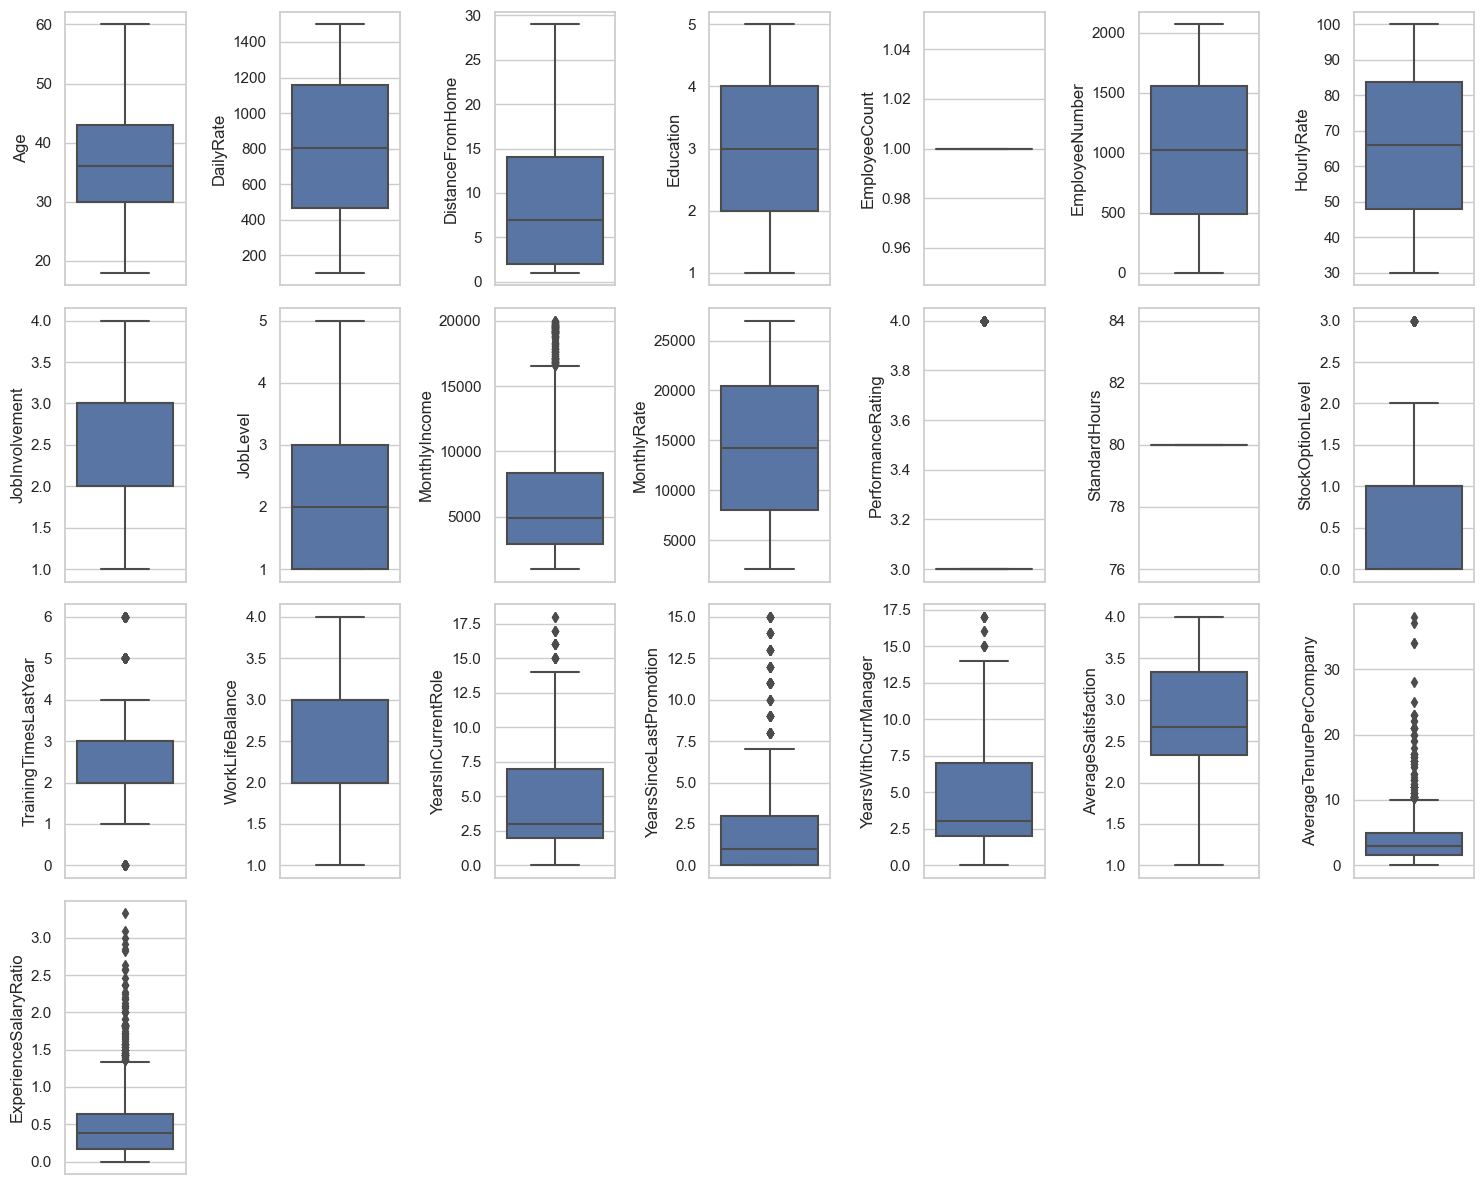

In [18]:
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(4, 7, i+1)
    sns.boxplot(y=df_test[nums[i]], orient='v')
    plt.tight_layout()

In [19]:
out_cols = ['MonthlyIncome', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AverageTenurePerCompany', 'ExperienceSalaryRatio']

#### Handling Outliers in The Training Dataset

In [22]:
# Using IQR
# train_iqr = df_train.copy()
# print(f'The number of rows before filtering out the outliers using IQR: {len(train_iqr)}')
# filtered_entries = np.array([True] * len(train_iqr))
# Q1 = train_iqr[out_cols].quantile(0.25)
# Q3 = train_iqr[out_cols].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (IQR * 1.5)
# high_limit = Q3 + (IQR * 1.5)
# filtered_entries = ((train_iqr[out_cols] >= low_limit) & (train_iqr[out_cols] <= high_limit)).all(axis=1)
# train_iqr = train_iqr[filtered_entries]
# print(f'The number of rows after filtering out the outliers using IQR: {len(train_iqr)}')

# Using Z-Score
# from scipy import stats
# train_zscore = df_train.copy()
# print(f'The number of rows before filtering out the outliers using Z-Score: {len(train_zscore)}')
# zscore = np.abs(stats.zscore(train_zscore[out_cols]))
# outliers = (zscore > 3).any(axis=1)
# train_zscore = train_zscore[~outliers]
# print(f'The number of rows after filtering out the outliers using Z-Score: {len(train_zscore)}')

The number of rows before filtering out the outliers using IQR: 1176
The number of rows after filtering out the outliers using IQR: 809
The number of rows before filtering out the outliers using Z-Score: 1176
The number of rows after filtering out the outliers using Z-Score: 1099


#### Handling Outliers in The Validating Dataset

In [23]:
# Using IQR
# val_iqr = df_val.copy()
# print(f'The number of rows before filtering out the outliers using IQR: {len(val_iqr)}')
# filtered_entries = np.array([True] * len(val_iqr))
# Q1 = val_iqr[out_cols].quantile(0.25)
# Q3 = val_iqr[out_cols].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (IQR * 1.5)
# high_limit = Q3 + (IQR * 1.5)
# filtered_entries = ((val_iqr[out_cols] >= low_limit) & (val_iqr[out_cols] <= high_limit)).all(axis=1)
# val_iqr = val_iqr[filtered_entries]
# print(f'The number of rows after filtering out the outliers using IQR: {len(val_iqr)}')

# Using Z-Score
# from scipy import stats
# val_zscore = df_val.copy()
# print(f'The number of rows before filtering out the outliers using Z-Score: {len(val_zscore)}')
# zscore = np.abs(stats.zscore(val_zscore[out_cols]))
# outliers = (zscore > 3).any(axis=1)
# val_zscore = val_zscore[~outliers]
# print(f'The number of rows after filtering out the outliers using Z-Score: {len(val_zscore)}')

The number of rows before filtering out the outliers using IQR: 294
The number of rows after filtering out the outliers using IQR: 235
The number of rows before filtering out the outliers using Z-Score: 294
The number of rows after filtering out the outliers using Z-Score: 278


**Summary:**
- Handling outliers using both z-score and IQR results in the removal of a significant amount of data (>5%), leading to the potential loss of valuable information. Therefore, outlier handling is not performed, and the impact of data considered as outliers will be minimized through the application of a scaling process.

### Feature Scaling

In [25]:
scaling_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                   'MonthlyRate', 'TrainingTimesLastYear', 'YearsInCurrentRole', 
                   'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AverageSatisfaction', 
                   'AverageTenurePerCompany', 'ExperienceSalaryRatio']

#### Yeo-Johnson Transformation
Feature scaling will be performed using the Yeo-Johnson transformation because the numeric columns contain data 0 values. This transformation is chosen for its ability to handle skewed distributions and work with a range of values that includes zero. Therefore, the scaling results will assist in enhancing balance and model interpretability.

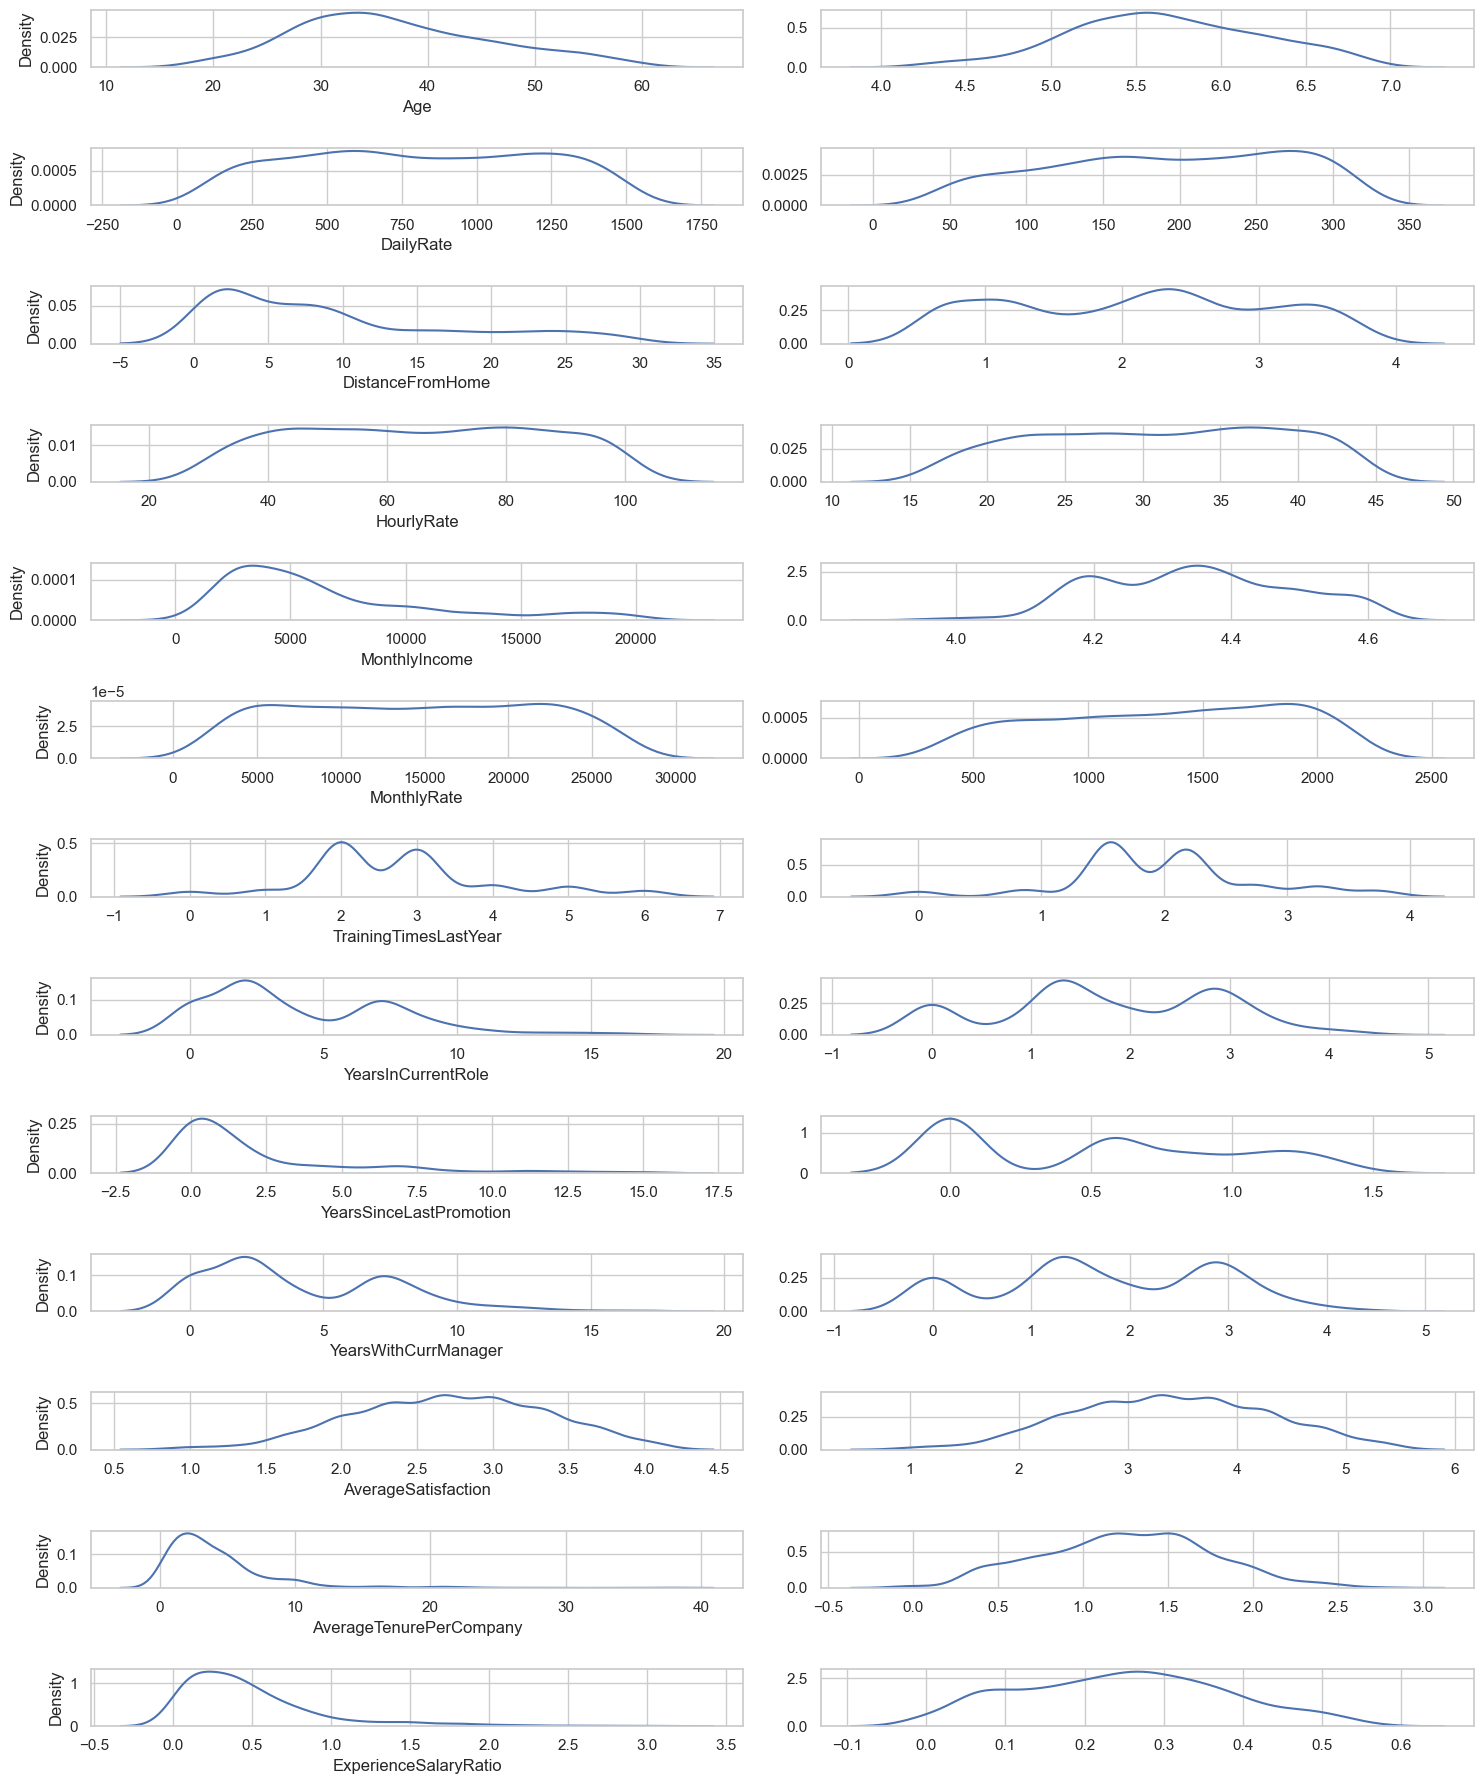

In [30]:
# Feature scaling for training dataset

fig, ax = plt.subplots(len(scaling_columns), 2, figsize=(15, 18))
for i in range(0, len(scaling_columns)):
    data, fitted_lambda = yeojohnson(df_train[scaling_columns[i]], lmbda=None)
    kde1 = sns.kdeplot(df_train[scaling_columns[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
plt.tight_layout()

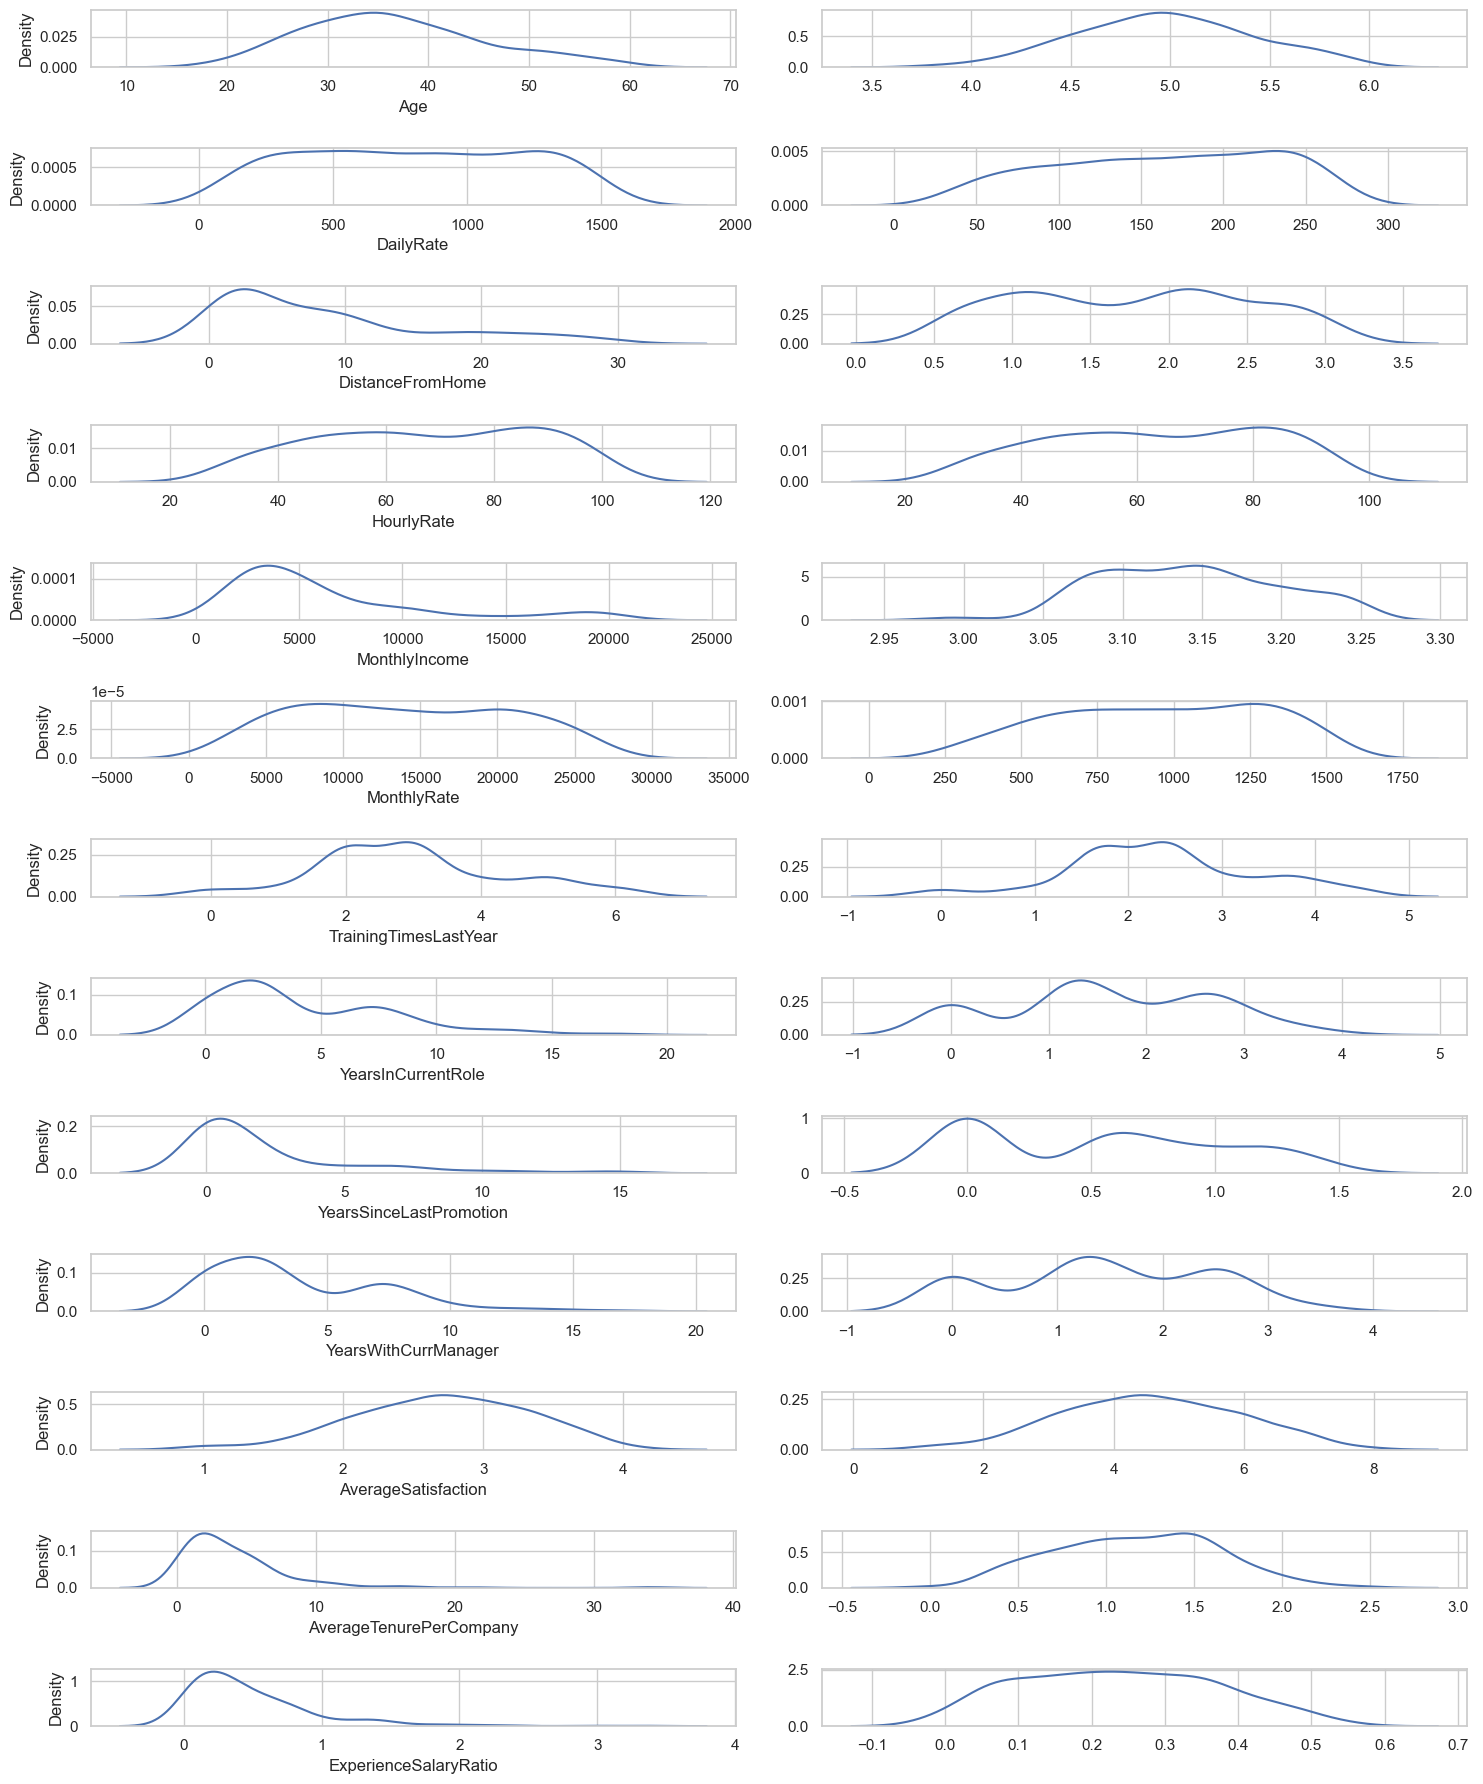

In [31]:
# Feature scaling for validating dataset

fig, ax = plt.subplots(len(scaling_columns), 2, figsize=(15, 18))
for i in range(0, len(scaling_columns)):
    data, fitted_lambda = yeojohnson(df_val[scaling_columns[i]], lmbda=None)
    kde1 = sns.kdeplot(df_val[scaling_columns[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
plt.tight_layout()

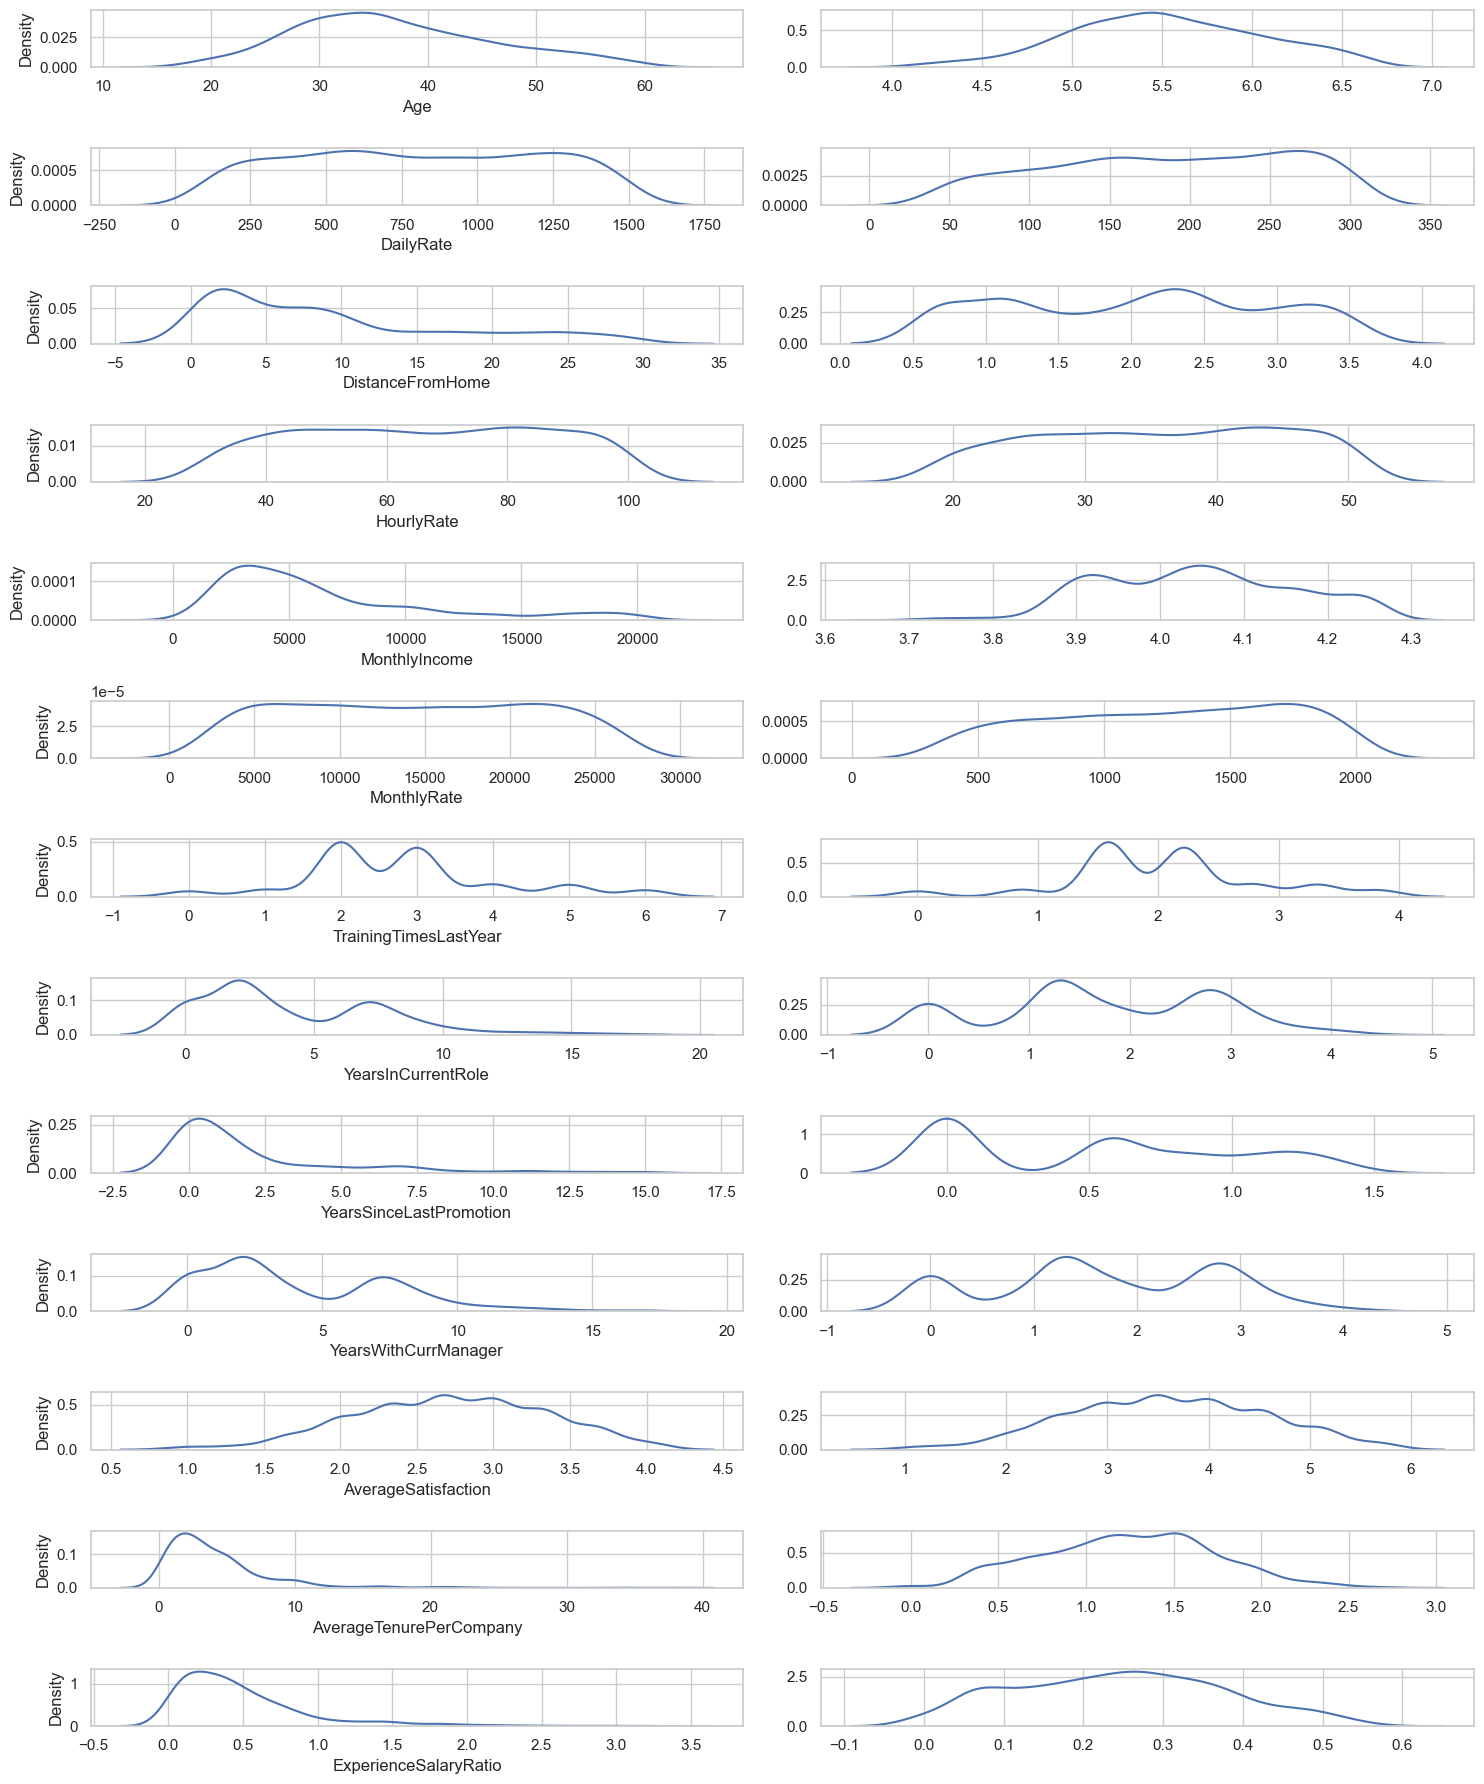

In [32]:
# Feature scaling for testing dataset

fig, ax = plt.subplots(len(scaling_columns), 2, figsize=(15, 18))
for i in range(0, len(scaling_columns)):
    data, fitted_lambda = yeojohnson(df_test[scaling_columns[i]], lmbda=None)
    kde1 = sns.kdeplot(df_test[scaling_columns[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
plt.tight_layout()

### Feature Encoding
Feature encoding will be performed using <b>label encoding</b> and <b>one-hot encoding with get_dummies</b>. Label encoding will be applied to columns with binary values or categorical values that have ordinal levels, such as `Attrition`, `BusinessTravel`, and `OverTime`. Meanwhile, one-hot encoding will be applied to other categorical columns that do not have ordinal levels.

#### Label Encoding

In [36]:
# Mapping for Attrition column
map_attrition = {
    'No' : 0,
    'Yes' : 1
}
df_train['Attrition'] = df_train['Attrition'].map(map_attrition)
df_val['Attrition'] = df_val['Attrition'].map(map_attrition)
df_test['Attrition'] = df_test['Attrition'].map(map_attrition)

# Mapping for BusinessTravel column
map_travel = {
    'Non-Travel' : 0,
    'Travel_Rarely' : 1,
    'Travel_Frequently' : 2
}
df_train['BusinessTravel'] = df_train['BusinessTravel'].map(map_travel)
df_val['BusinessTravel'] = df_val['BusinessTravel'].map(map_travel)
df_test['BusinessTravel'] = df_test['BusinessTravel'].map(map_travel)

# Mapping for OverTime column
map_overtime = {
    'No' : 0,
    'Yes' : 1
}
df_train['OverTime'] = df_train['OverTime'].map(map_overtime)
df_val['OverTime'] = df_val['OverTime'].map(map_overtime)
df_test['OverTime'] = df_test['OverTime'].map(map_overtime)

#### One Hot Encoding

In [39]:
df_train = pd.get_dummies(df_train, columns=['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])
df_val = pd.get_dummies(df_val, columns=['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])
df_test = pd.get_dummies(df_test, columns=['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

#### Align Training and Validatig Data Columns

In [40]:
'''
Check for missing columns in the training data compared to the validating data. 
If there are any missing columns, add them with a default value of 0.
'''

# Training dataset
missing_columns_train = set(df_val.columns) - set(df_train.columns)
for col in missing_columns_train:
    df_train[col] = 0
print(f'Shape of training data: {df_train.shape}')

# Validating dataset 
missing_columns_val = set(df_train.columns) - set(df_val.columns)
for col in missing_columns_val:
    df_val[col] = 0
print(f'Shape of validating data: {df_val.shape}')

Shape of training data: (1176, 49)
Shape of validating data: (294, 49)


#### Dropped Columns
The `EmployeeCount` and `Over18` columns are dropped due to their uniform distribution, suggesting they may not contribute to feature importance as there is no differentiation between employees with attrition and those without. Additionally, the `EmployeeNumber` column is removed as it solely serves as a unique identifier for each employee, and therefore, this information is unlikely to provide meaningful contributions to the model learning process.

In [42]:
df_train.drop(['EmployeeCount', 'EmployeeNumber', 'Over18'], axis=1, inplace=True)
df_val.drop(['EmployeeCount', 'EmployeeNumber', 'Over18'], axis=1, inplace=True)
df_test.drop(['EmployeeCount', 'EmployeeNumber', 'Over18'], axis=1, inplace=True)

### Handle Imbalance Class

#### Resampling: Upsampling

In [43]:
# Check the distribution of the Attrition column
df_train['Attrition'].value_counts()

0    986
1    190
Name: Attrition, dtype: int64

In [46]:
# create two different dataframe of majority and minority class 
majority_class = df_train[(df_train['Attrition'] == 0)] 
minority_class = df_train[(df_train['Attrition'] == 1)] 

# upsample minority class
minority_class_upsampled = resample(minority_class, 
                                    replace=True, # sample with replacement
                                    n_samples=986, # to match majority class
                                    random_state=42) # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([minority_class_upsampled, majority_class])

#### Oversampling using SMOTE

In [191]:
# X_train = df_train.drop('Attrition', axis=1) 
# y_train = df_train['Attrition']

In [139]:
# from imblearn import over_sampling
# from imblearn.over_sampling import SMOTE
#
# print(f'Target in Original Data:')
# print(pd.Series(y_train_SMOTE).value_counts(), end='\n\n')
# X_SMOTE, y_SMOTE = over_sampling.SMOTE(sampling_strategy="auto").fit_resample(X_train_SMOTE, y_train_SMOTE)
# print('Target After Oversampling Using SMOTE:')
# print(pd.Series(y_SMOTE).value_counts())

Target in Original Data:
0    986
1    190
Name: Attrition, dtype: int64

Target After Oversampling Using SMOTE:
0    986
1    986
Name: Attrition, dtype: int64


#### Oversampling using RandomOverSampler

In [192]:
# from imblearn.over_sampling import RandomOverSampler
# 
# print('Target in Original Data:')
# print(pd.Series(y_train).value_counts(), end='\n\n')
# X_over, y_over = RandomOverSampler(sampling_strategy="auto").fit_resample(X_train, y_train)
# print('Target After Oversampling:')
# print(pd.Series(y_over).value_counts())

Target in Original Data:
0    986
1    190
Name: Attrition, dtype: int64

Target After Oversampling:
0    986
1    986
Name: Attrition, dtype: int64


#### Undersampling using RandomUnderSampler

In [215]:
# from imblearn.under_sampling import RandomUnderSampler
#
# print('Target in Original Data:')
# print(pd.Series(y_train).value_counts(), end='\n\n')
# X_under, y_under = RandomUnderSampler(sampling_strategy="auto").fit_resample(X_train, y_train)
# print('Target After Oversampling:')
# print(pd.Series(y_under).value_counts())

Target in Original Data:
0    986
1    190
Name: Attrition, dtype: int64

Target After Oversampling:
0    190
1    190
Name: Attrition, dtype: int64


**Summary:**
Imbalanced class handling is addressed through resampling, specifically upsampling. Methods such as upsampling, RandomOverSampler, and SMOTE for oversampling show comparable performance, with upsampling considered more effective in handling class imbalance. Meanwhile, undersampling with RandomUnderSampler demonstrates suboptimal performance, possibly due to the limited size of the training data, which is smaller than the validation data, posing challenges in predicting the validation set.

### Feature Selection
Several feature selection methods were employed in this analysis, including:
1. ANOVA
2. Variance Threshold
3. Mutual Information
4. Select K-Best
5. Feature Importance by ExtraTreesClassifier
6. Multicollinearity

These methods were applied to identify the most relevant features, ensuring the inclusion of variables that provide valuable insights into payment difficulties, and facilitating dimensionality reduction when necessary.

In [47]:
# Define X_train and y_train
X_train = df_upsampled.drop(['Attrition'], axis=1) #features
y_train = df_upsampled['Attrition'] #target

#### ANOVA

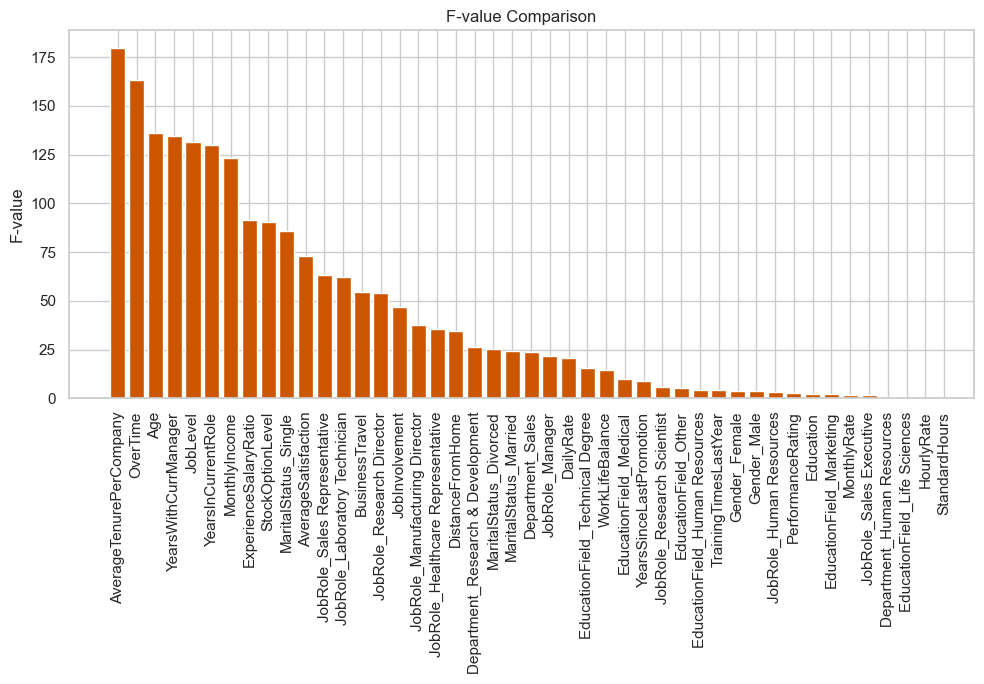

In [50]:
f_value, _ = f_classif(X_train, y_train)

feature_scores = pd.DataFrame({
    "feature_names": X_train.columns,
    "feature_value": f_value
}).sort_values("feature_value", ascending=False)
top_50_features = feature_scores.head(50)

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(data=top_50_features, x="feature_names", height="feature_value", color="#CC5500")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.tight_layout()
plt.show()

In [51]:
feature_importance = []
for i in feature_scores["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['AverageTenurePerCompany',
 'OverTime',
 'Age',
 'YearsWithCurrManager',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'ExperienceSalaryRatio',
 'StockOptionLevel',
 'MaritalStatus_Single']

#### Variance Threshold

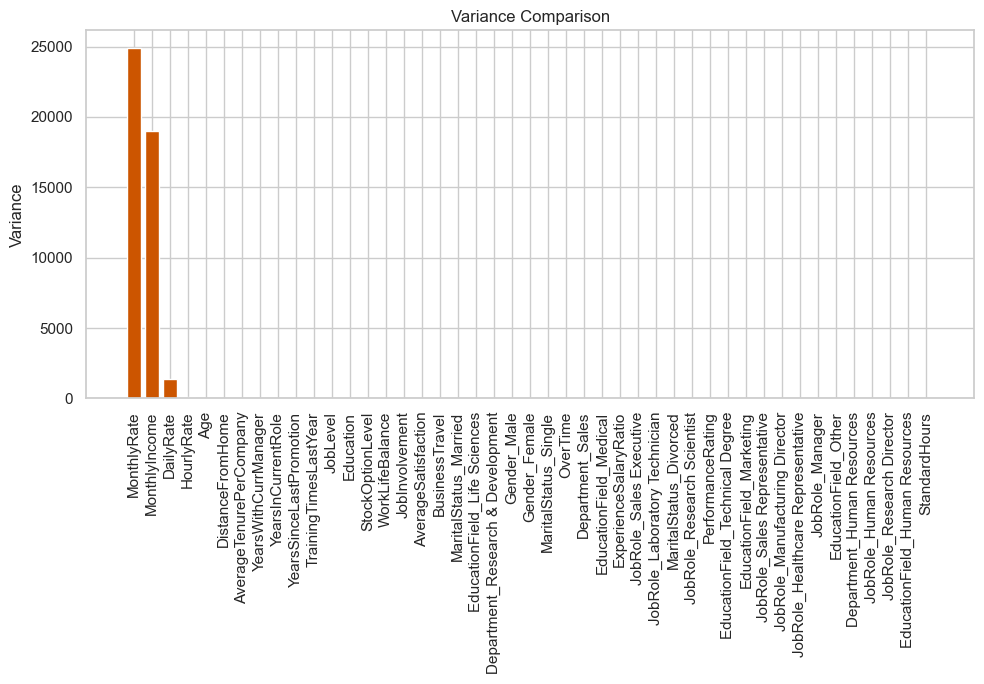

In [52]:
selector = VarianceThreshold(threshold=0.0)
X_train_transformed = selector.fit_transform(X_train)

feature_scores = pd.DataFrame({
    "feature_names": X_train.columns,
    "variances": selector.variances_
}).sort_values("variances", ascending=False)
top_50_features = feature_scores.head(50)

plt.figure(figsize=(10, 7))
plt.bar(data=top_50_features, x="feature_names", height="variances", color="#CC5500")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.tight_layout()
plt.show()

In [53]:
for i in feature_scores["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['AverageTenurePerCompany',
 'OverTime',
 'Age',
 'YearsWithCurrManager',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'ExperienceSalaryRatio',
 'StockOptionLevel',
 'MaritalStatus_Single',
 'MonthlyRate',
 'DailyRate',
 'HourlyRate',
 'DistanceFromHome',
 'YearsSinceLastPromotion']

#### Mutual Information

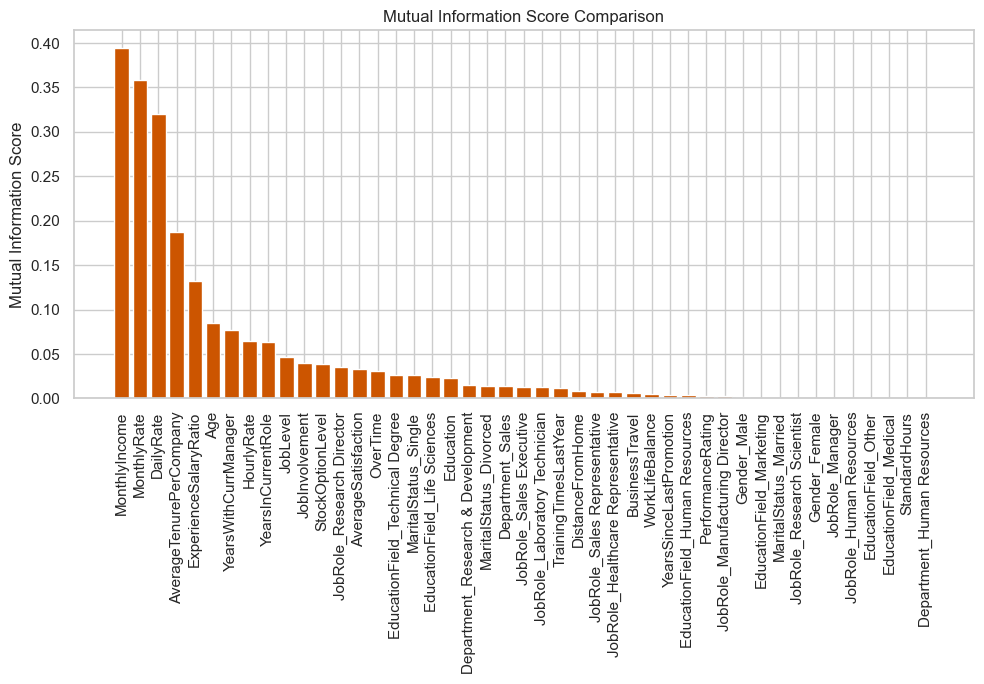

In [54]:
MI_score = mutual_info_classif(X_train, y_train, random_state=0)

feature_scores = pd.DataFrame({
    "feature_names": X_train.columns,
    "MI_score": MI_score
}).sort_values("MI_score", ascending=False)
top_50_features = feature_scores.head(50)

plt.figure(figsize=(10, 7))
plt.bar(data=top_50_features, x="feature_names", height="MI_score", color="#CC5500")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.tight_layout()
plt.show()

In [55]:
for i in feature_scores["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['AverageTenurePerCompany',
 'OverTime',
 'Age',
 'YearsWithCurrManager',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'ExperienceSalaryRatio',
 'StockOptionLevel',
 'MaritalStatus_Single',
 'MonthlyRate',
 'DailyRate',
 'HourlyRate',
 'DistanceFromHome',
 'YearsSinceLastPromotion']

#### Select K-Best

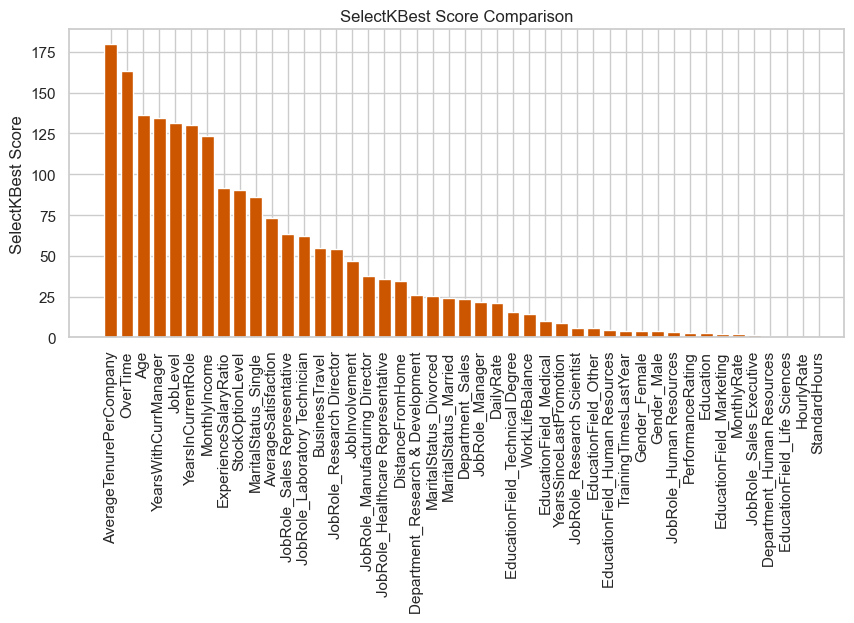

In [56]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Specs', 'Score']  
feature_scores.sort_values('Score', ascending=False, inplace=True)
top_50_features = feature_scores.head(50)

plt.figure(figsize=(10, 4))
plt.bar(data=top_50_features, x="Specs", height="Score", color="#CC5500")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

In [57]:
for i in feature_scores["Specs"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['AverageTenurePerCompany',
 'OverTime',
 'Age',
 'YearsWithCurrManager',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'ExperienceSalaryRatio',
 'StockOptionLevel',
 'MaritalStatus_Single',
 'MonthlyRate',
 'DailyRate',
 'HourlyRate',
 'DistanceFromHome',
 'YearsSinceLastPromotion']

#### Feature Importance by ExtraTreesClassifier

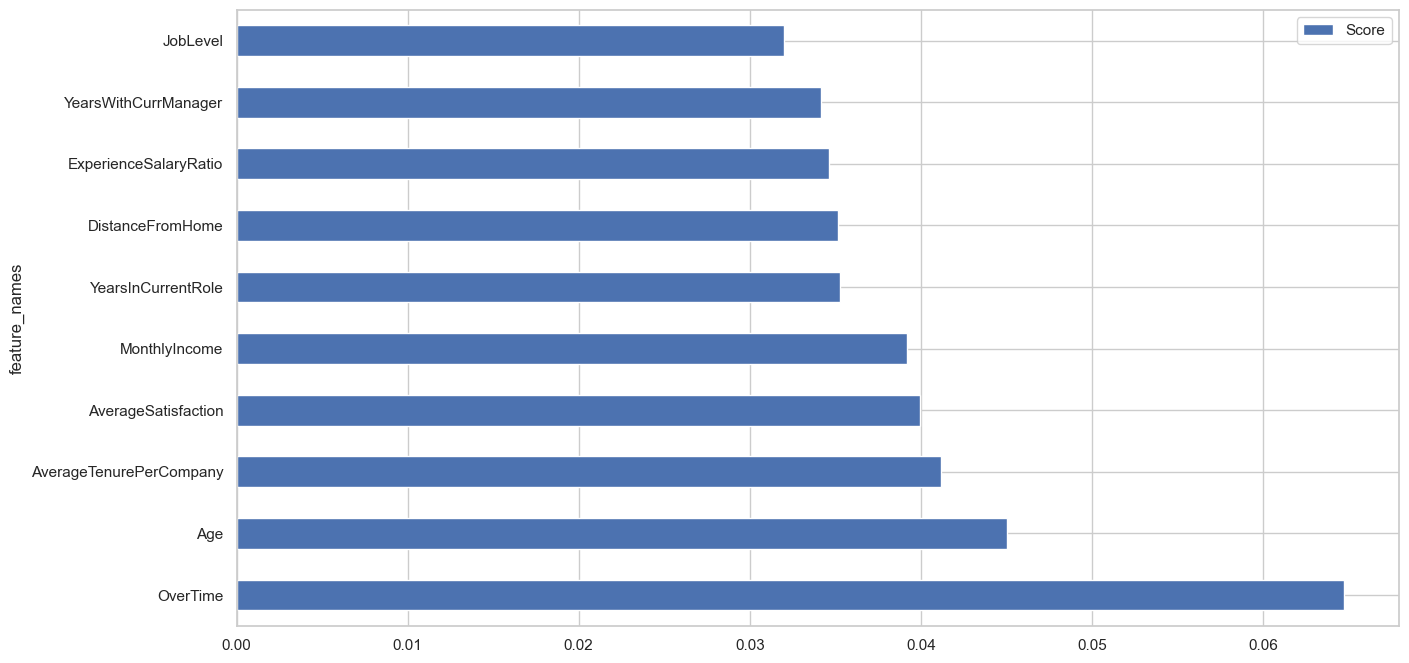

In [59]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

In [60]:
for i in feat_importances["feature_names"].values[:10]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['AverageTenurePerCompany',
 'OverTime',
 'Age',
 'YearsWithCurrManager',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'ExperienceSalaryRatio',
 'StockOptionLevel',
 'MaritalStatus_Single',
 'MonthlyRate',
 'DailyRate',
 'HourlyRate',
 'DistanceFromHome',
 'YearsSinceLastPromotion',
 'AverageSatisfaction']

#### Multicollinearity

In [61]:
corr = df_train.corrwith(df_train["Attrition"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

index  corr value Corr Type
0                     Attrition        1.00   Positif
1                      OverTime        0.21   Positif
2                           Age        0.19   Negatif
3       AverageTenurePerCompany        0.18   Negatif
4          MaritalStatus_Single        0.17   Positif
5          YearsWithCurrManager        0.17   Negatif
6            YearsInCurrentRole        0.17   Negatif
7                      JobLevel        0.17   Negatif
8  JobRole_Sales Representative        0.16   Positif
9                 MonthlyIncome        0.16   Negatif

In [62]:
corr = df_train.corrwith(df_train["Attrition"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

target = "Attrition"
high_corr_cols = [i for i in list(corr[corr["corr value"] > -1]["index"].values) if i != target]

In [63]:
for i in corr["index"].values[:10]:
    if i not in feature_importance and not target:
        feature_importance.append(i)
feature_importance

['AverageTenurePerCompany',
 'OverTime',
 'Age',
 'YearsWithCurrManager',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'ExperienceSalaryRatio',
 'StockOptionLevel',
 'MaritalStatus_Single',
 'MonthlyRate',
 'DailyRate',
 'HourlyRate',
 'DistanceFromHome',
 'YearsSinceLastPromotion',
 'AverageSatisfaction']

<Axes: >

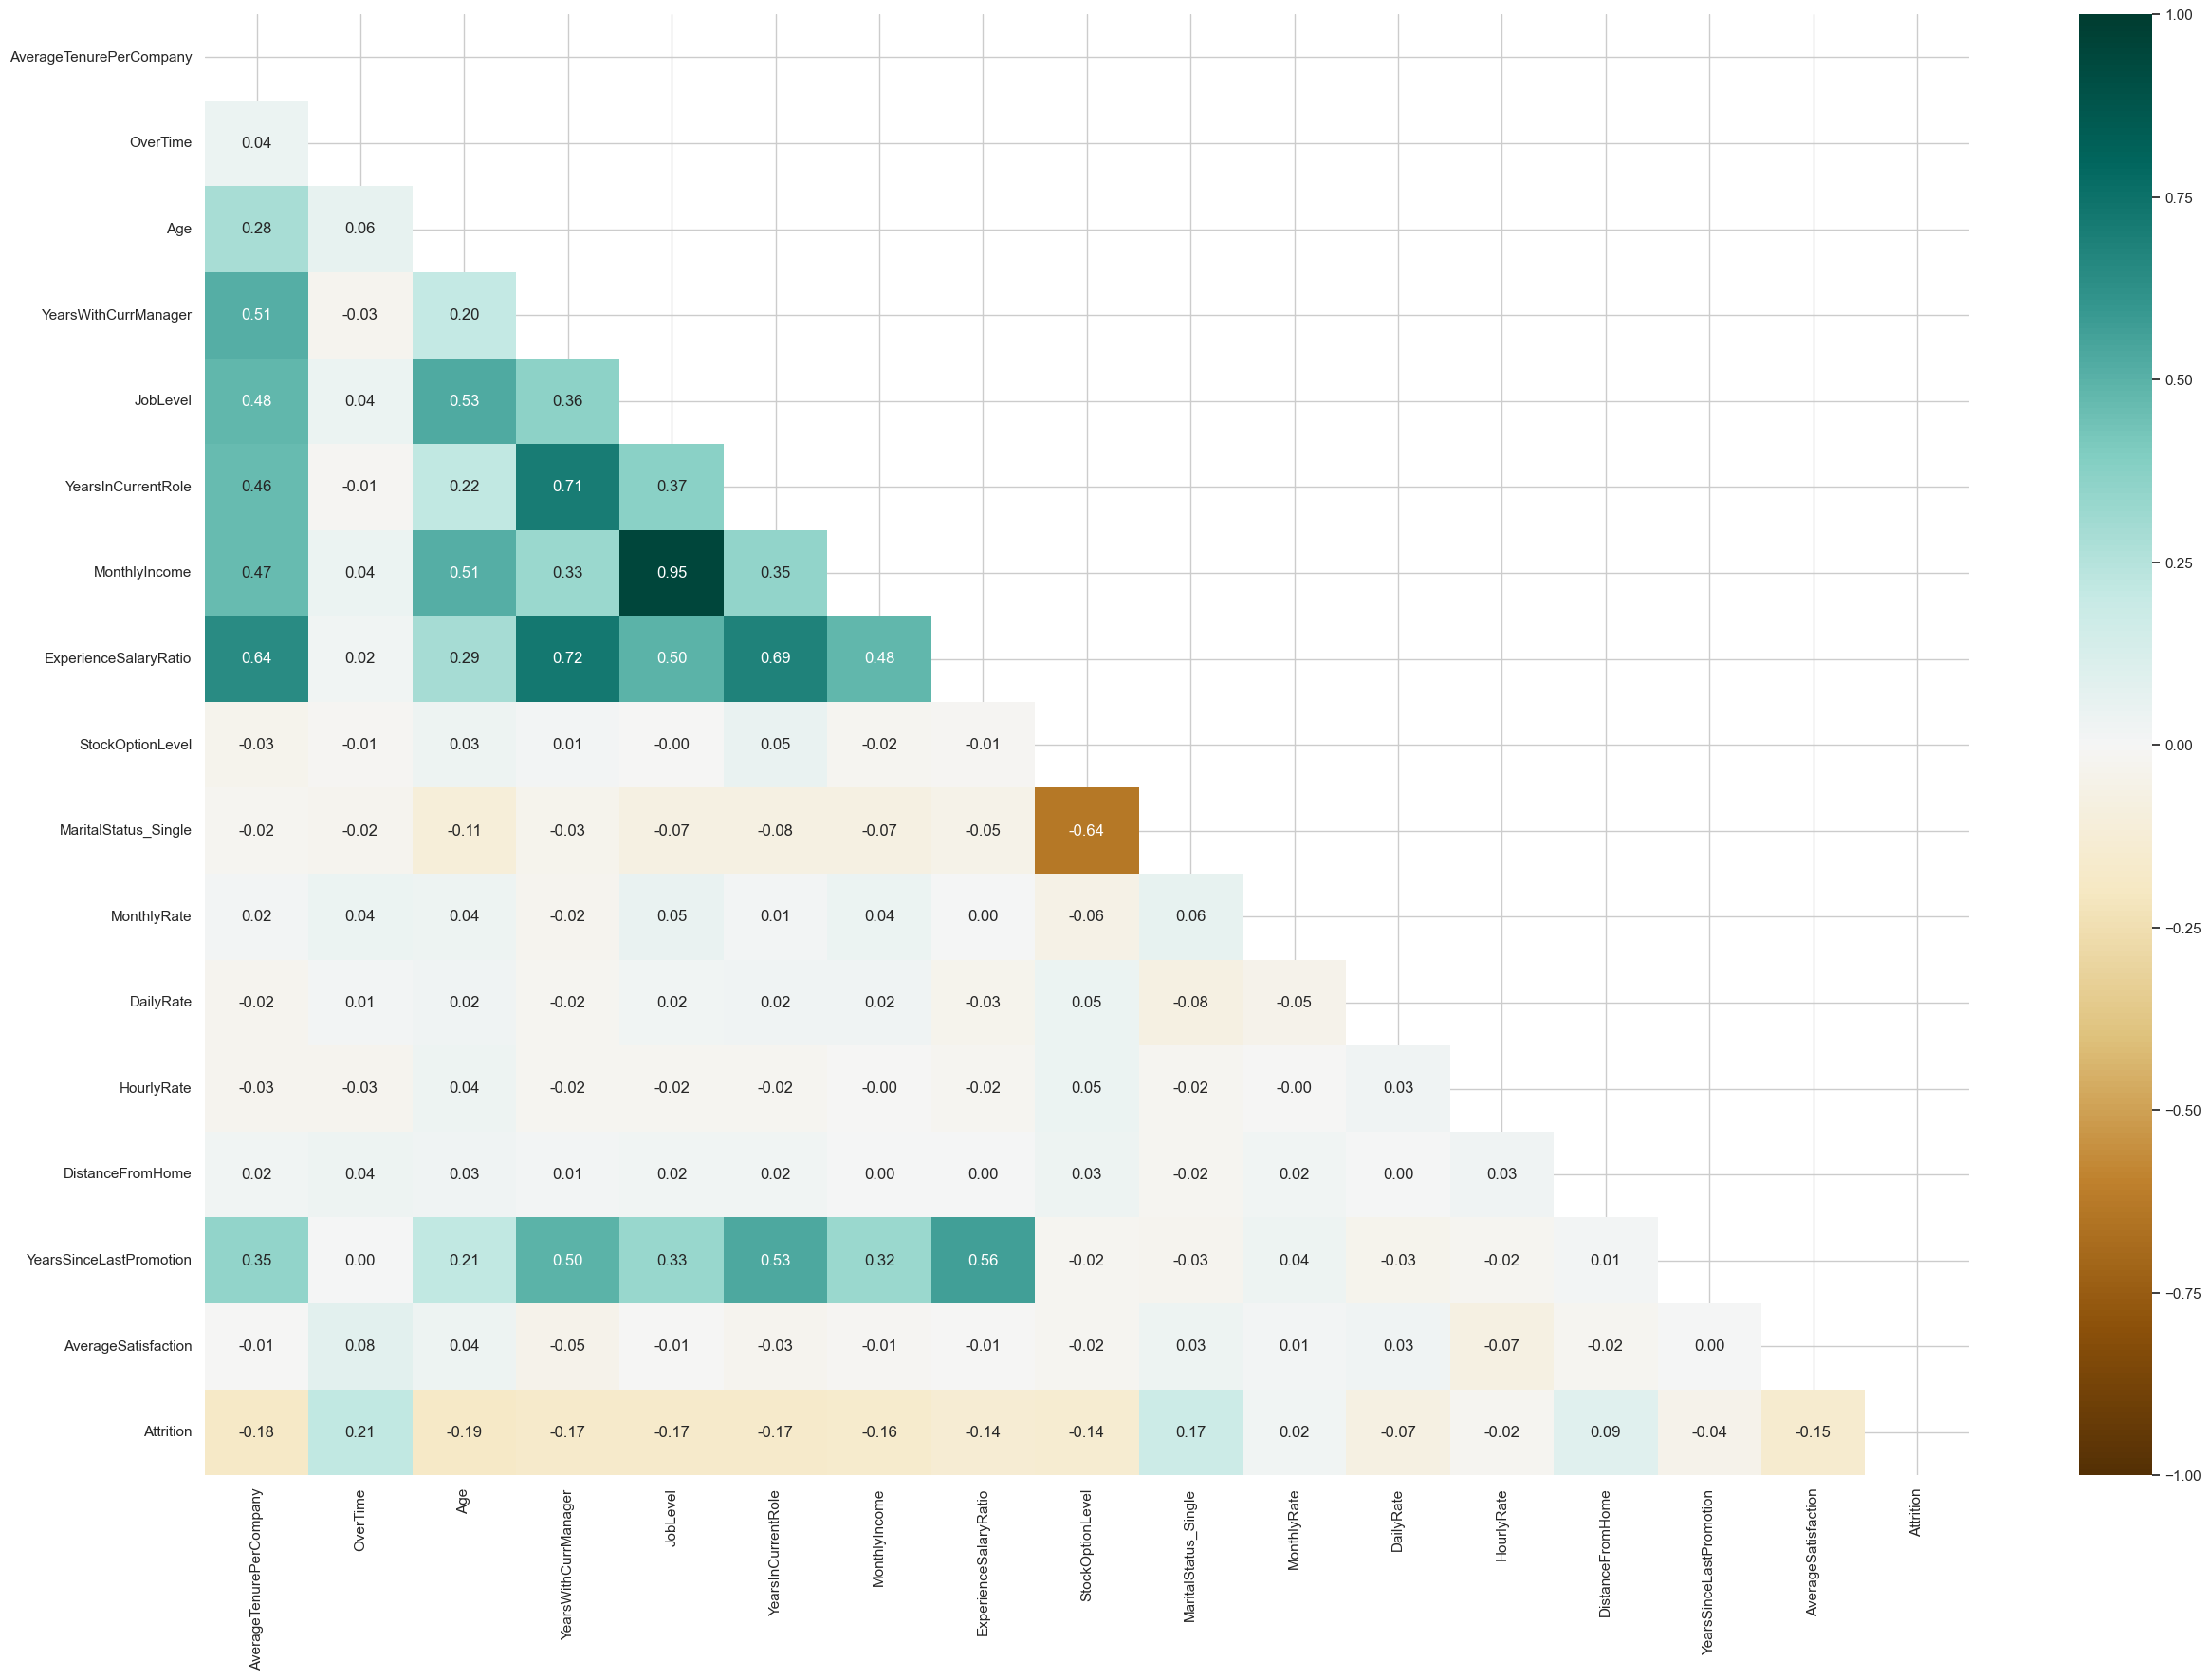

In [67]:
plt.figure(figsize=(30, 20))
corr = df_train[feature_importance+["Attrition"]].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG', annot=True, fmt='.2f', mask=mask)

In [69]:
final_feature = ['AverageTenurePerCompany', 'OverTime', 'Age', 'YearsWithCurrManager', 'JobLevel', 
                 'YearsInCurrentRole', 'ExperienceSalaryRatio', 'StockOptionLevel', 
                 'MaritalStatus_Single', 'MonthlyRate', 'DailyRate', 'HourlyRate', 'DistanceFromHome',
                 'YearsSinceLastPromotion', 'AverageSatisfaction']

#### Define X (Features) and y (Target) for Modeling

In [70]:
# Features and target for training model
X_train = df_upsampled.drop(['Attrition'], axis=1)[final_feature].reset_index(drop=True) 
y_train = df_upsampled['Attrition'].reset_index(drop=True) 
print(f'Shape of X_train and y_train: {X_train.shape, y_train.shape}')

# Features and target for validating model
X_val = df_val.drop(['Attrition'], axis=1)[final_feature].reset_index(drop=True) 
y_val = df_val['Attrition'].reset_index(drop=True) 
print(f'Shape of X_val and y_val: {X_val.shape, y_val.shape}')

Shape of X_train and y_train: ((1972, 15), (1972,))
Shape of X_val and y_val: ((294, 15), (294,))


In [71]:
# Features and target for testing model
X_test = df_test.drop(['Attrition'], axis=1)[final_feature].reset_index(drop=True) 
y_test = df_test['Attrition'].reset_index(drop=True) 
print(f'Shape of X_test and y_test: {X_test.shape, y_test.shape}')

Shape of X_test and y_test: ((1470, 15), (1470,))


## Modeling
Due to the absence of outlier handling, machine learning model development is exclusively carried out for algorithms that are more tolerant or robust to outlier data, such as:
1. Decision Tree
2. Random Forest
3. Adaptive Boosting Classifier
4. eXtreme Gradient Boosting Classifier
5. Gradient Boosting Classifier

### Decision Tree

In [74]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
print(dt_model)

DecisionTreeClassifier()


#### Predict Data Train

In [75]:
y_train_pred_dt = dt_model.predict(X_train)
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



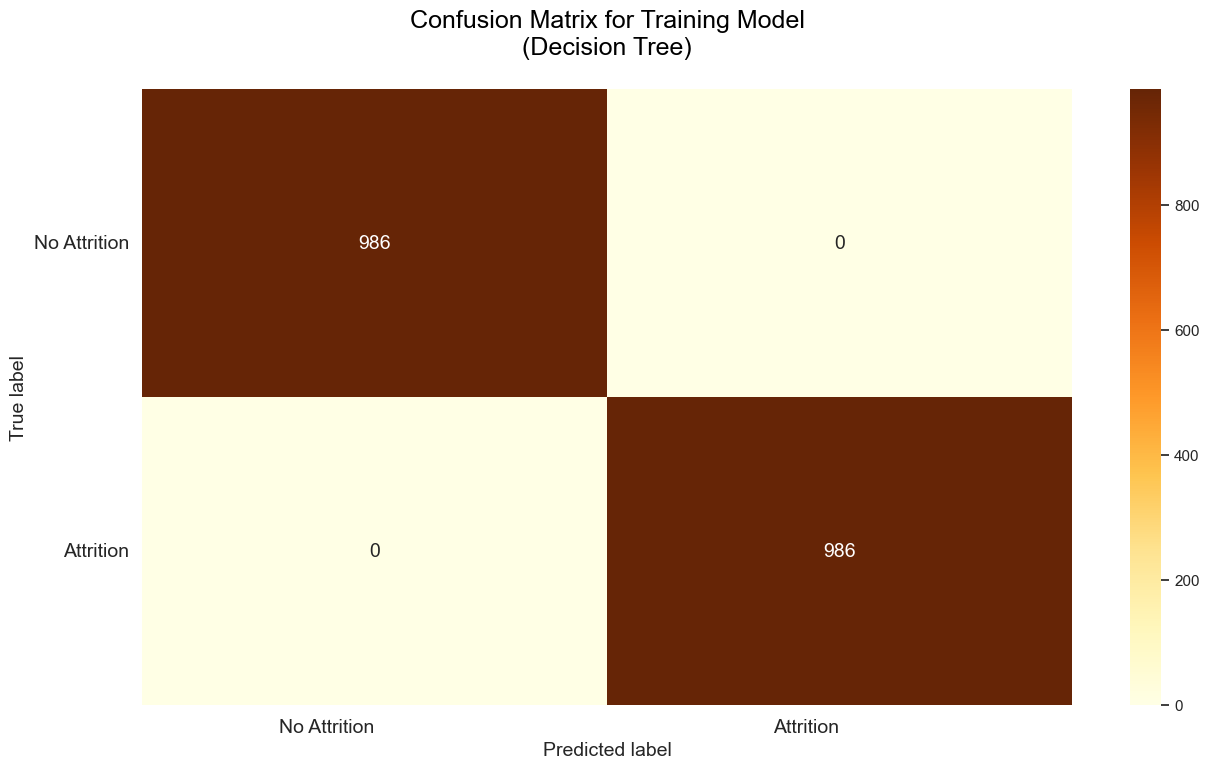

In [77]:
# Form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Predict Data Validation

In [78]:
y_val_pred_dt = dt_model.predict(X_val)
print('Classification Report Validating Model (Decision Tree):')
print(classification_report(y_val, y_val_pred_dt))

Classification Report Validating Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       247
           1       0.26      0.26      0.26        47

    accuracy                           0.77       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.76      0.77      0.76       294



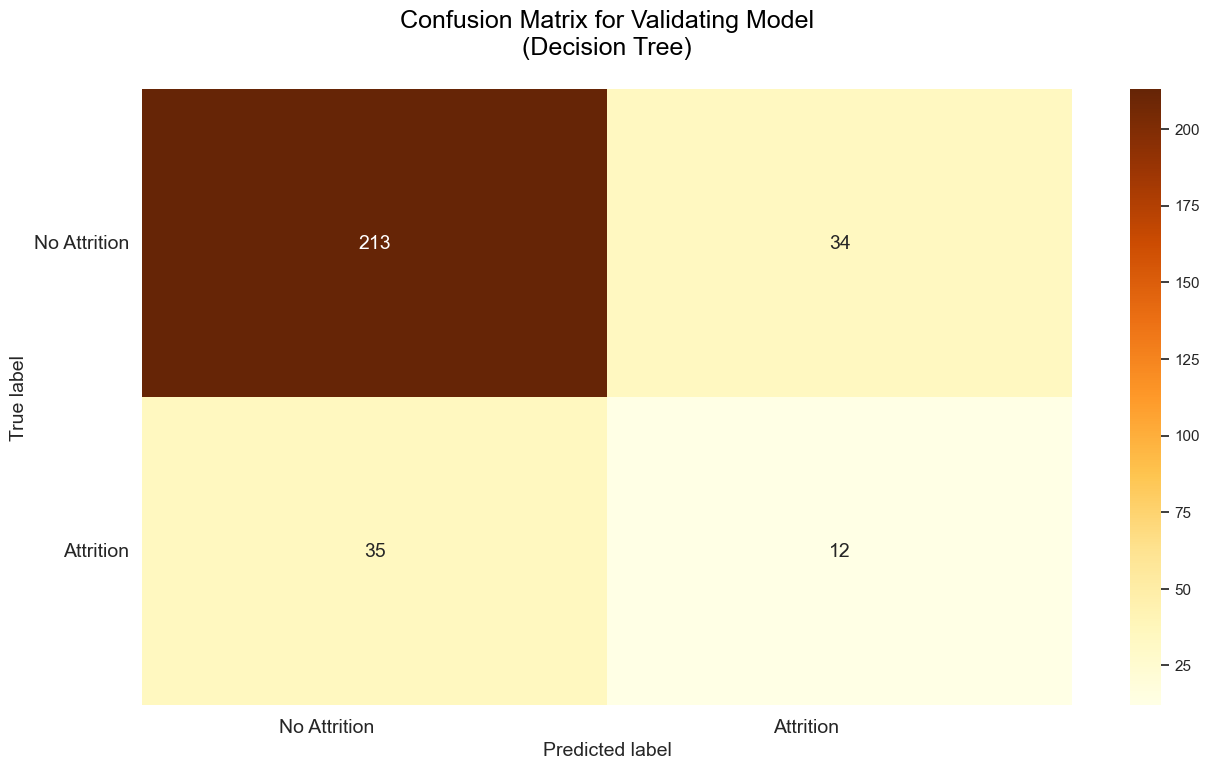

In [79]:
# Form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_val, y_val_pred_dt)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Validating Model\n(Decision Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Model Performance

In [82]:
# Recall
recall_train = recall_score(y_train, y_train_pred_dt)
print(f'Recall Train: {round(recall_train, 2)}')
recall_val = recall_score(y_val, y_val_pred_dt, average='weighted')
print(f'Recall Validation: {round(recall_val, 2)}', end='\n\n')

# Precision
precision_train = precision_score(y_train, y_train_pred_dt)
print(f'Precision Train: {round(precision_train, 2)}')
precision_val = precision_score(y_val, y_val_pred_dt, average='weighted')
print(f'Precision Validation: {round(precision_val, 2)}', end='\n\n')

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred_dt)
print(f'Accuracy Train: {round(accuracy_train, 2)}')
accuracy_val = accuracy_score(y_val, y_val_pred_dt)
print(f'Accuracy Validation: {round(accuracy_val, 2)}')

Recall Train: 1.0
Recall Validation: 0.77

Precision Train: 1.0
Precision Validation: 0.76

Accuracy Train: 1.0
Accuracy Validation: 0.77


**Summary:**
Using the `average='weighted'` parameter on validation data due to its imbalanced target, provides a more accurate depiction of the model's performance in handling the uneven distribution of target classes. 

In [83]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, title):
    plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {auc}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')

ROC AUC (Train): 1.0
ROC AUC (Validation): 0.56


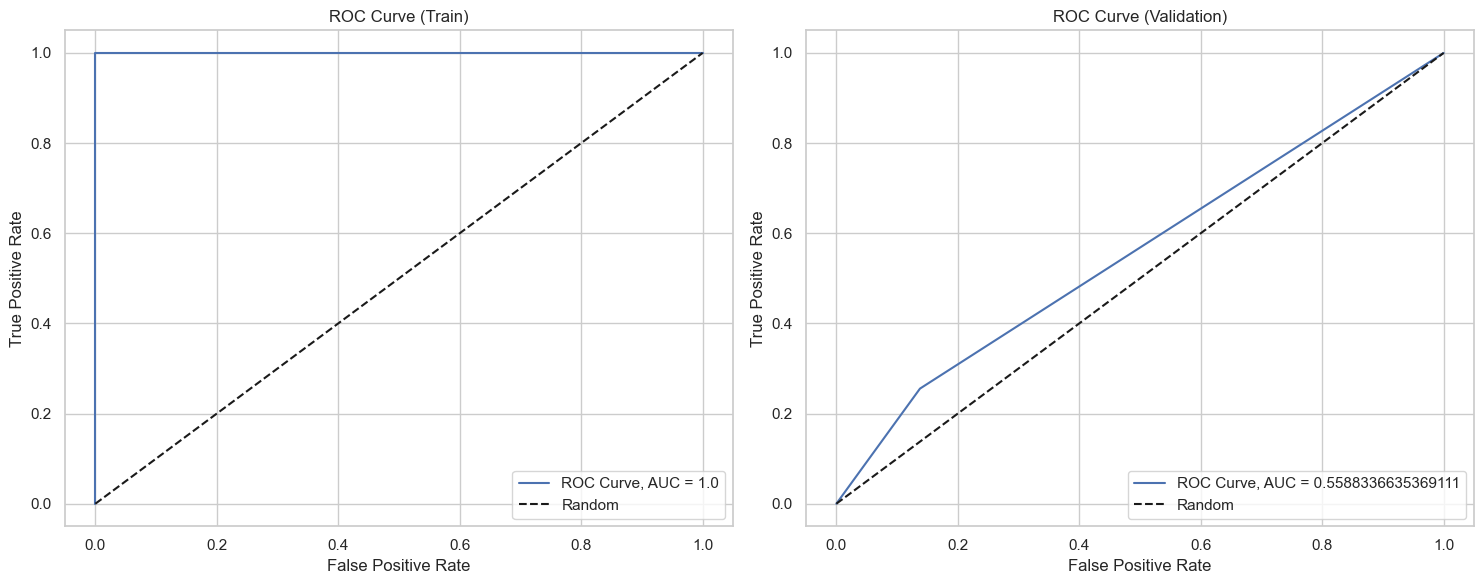

In [84]:
# ROC AUC (Train)
roc_auc_train = roc_auc_score(y_train, y_train_pred_dt)
print(f'ROC AUC (Train): {round(roc_auc_train, 2)}')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_dt) # ROC Curve (Train)

# ROC AUC (Validation)
roc_auc_val = roc_auc_score(y_val, y_val_pred_dt)
print(f'ROC AUC (Validation): {round(roc_auc_val, 2)}')
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_dt) # ROC Curve (Validation)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_roc_curve(fpr_train, tpr_train, roc_auc_train, 'ROC Curve (Train)')
plt.subplot(1, 2, 2)
plot_roc_curve(fpr_val, tpr_val, roc_auc_val, 'ROC Curve (Validation)')
plt.tight_layout()
plt.show()

### Random Forest

In [85]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


#### Predict Data Train

In [86]:
y_train_pred_rf = rf_model.predict(X_train)
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



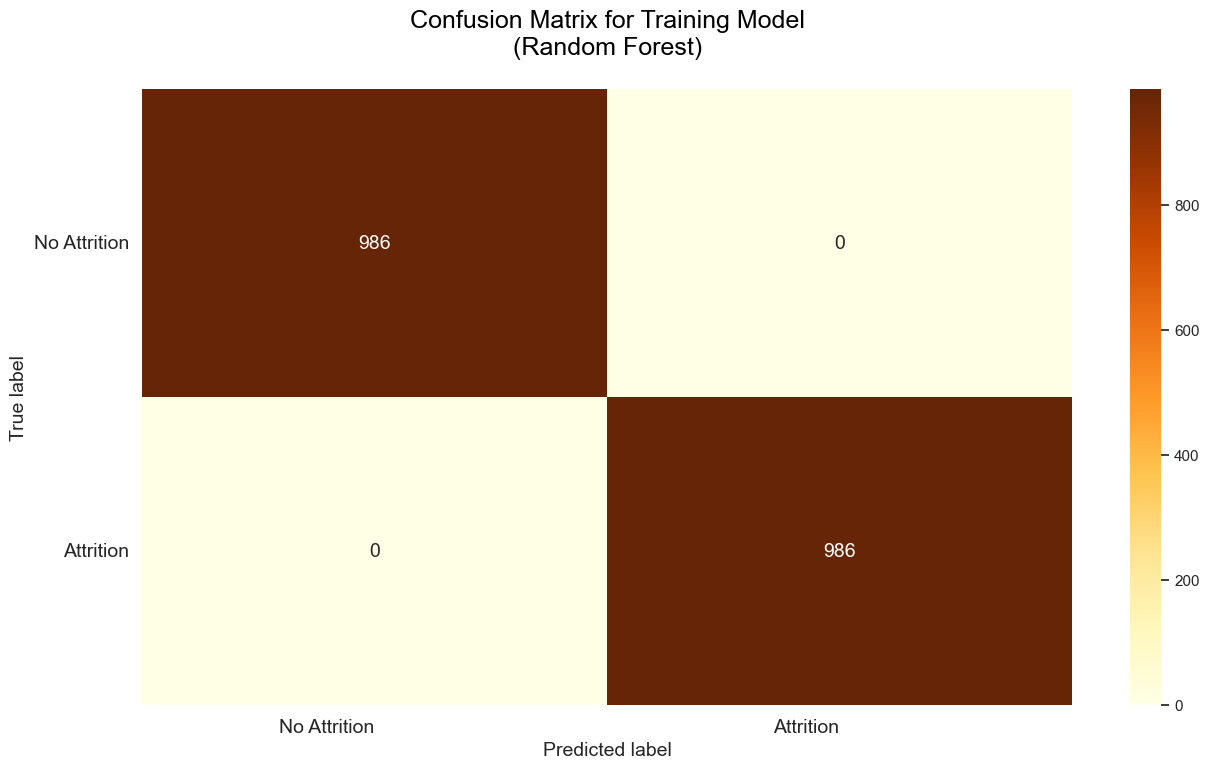

In [87]:
# Form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Predict Data Validation

In [88]:
y_val_pred_rf = rf_model.predict(X_val)
print('Classification Report Validating Model (Random Forest):')
print(classification_report(y_val, y_val_pred_rf))

Classification Report Validating Model (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       247
           1       0.37      0.23      0.29        47

    accuracy                           0.81       294
   macro avg       0.62      0.58      0.59       294
weighted avg       0.78      0.81      0.80       294



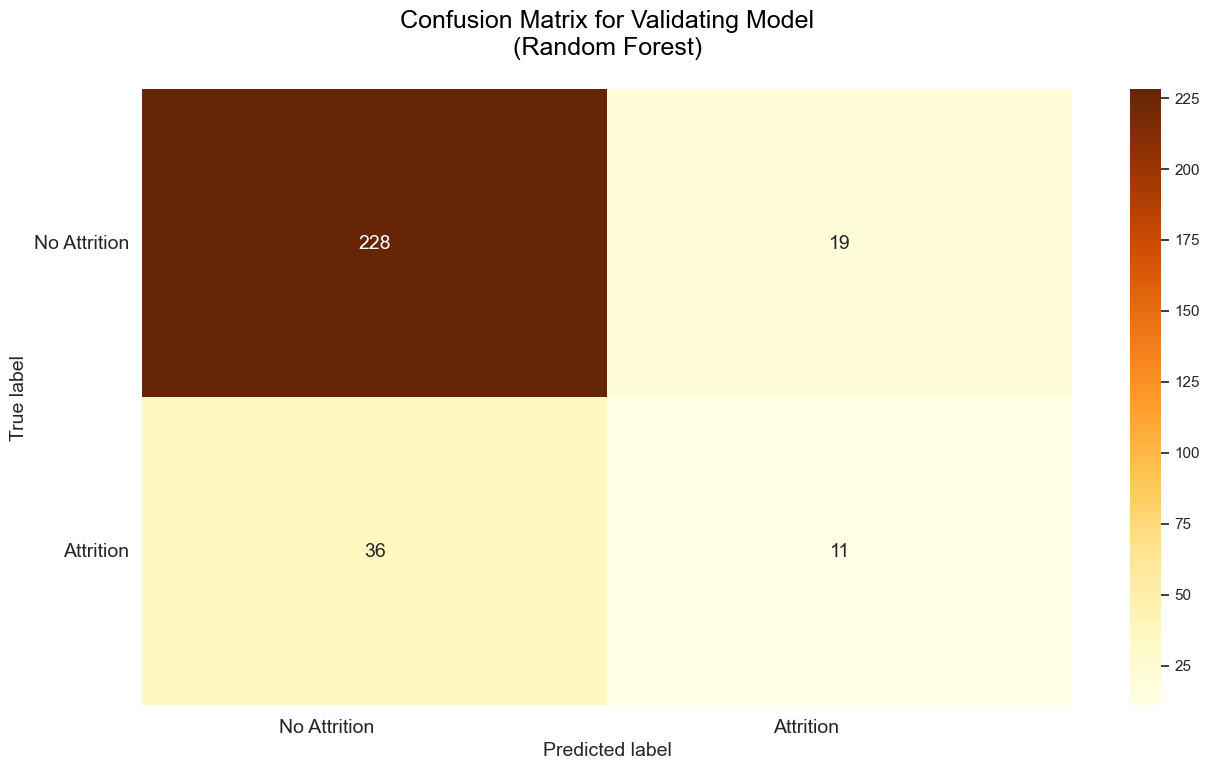

In [179]:
# Form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_val, y_val_pred_rf)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Validating Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Model Performance

In [91]:
# Recall
recall_train = recall_score(y_train, y_train_pred_rf)
print(f'Recall Train: {round(recall_train, 2)}')
recall_val = recall_score(y_val, y_val_pred_rf, average='weighted')
print(f'Recall Validation: {round(recall_val, 2)}', end='\n\n')

# Precision
precision_train = precision_score(y_train, y_train_pred_rf)
print(f'Precision Train: {round(precision_train, 2)}')
precision_val = precision_score(y_val, y_val_pred_rf, average='weighted')
print(f'Precision Validation: {round(precision_val, 2)}', end='\n\n')

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred_rf)
print(f'Accuracy Train: {round(accuracy_train, 2)}')
accuracy_val = accuracy_score(y_val, y_val_pred_rf)
print(f'Accuracy Validation: {round(accuracy_val, 2)}')

Recall Train: 1.0
Recall Validation: 0.81

Precision Train: 1.0
Precision Validation: 0.78

Accuracy Train: 1.0
Accuracy Validation: 0.81


ROC AUC (Train): 1.0
ROC AUC (Validation): 0.58


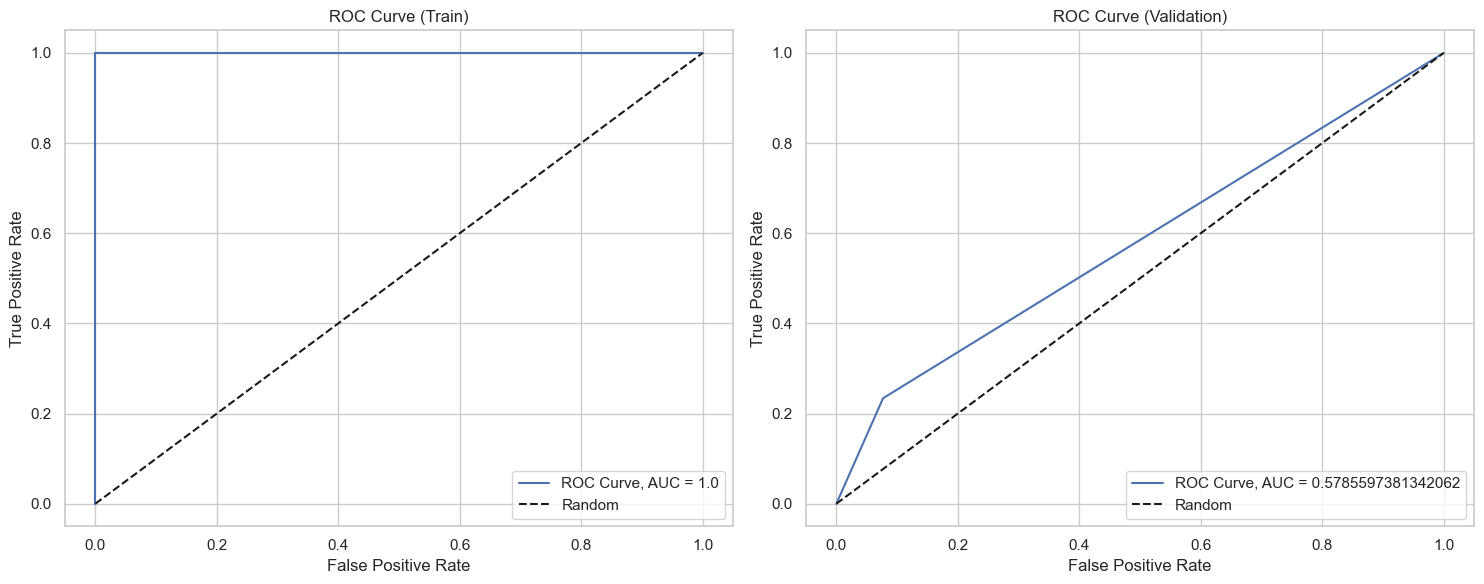

In [92]:
# ROC AUC (Train)
roc_auc_train = roc_auc_score(y_train, y_train_pred_rf)
print(f'ROC AUC (Train): {round(roc_auc_train, 2)}')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_rf) # ROC Curve (Train)

# ROC AUC (Validation)
roc_auc_val = roc_auc_score(y_val, y_val_pred_rf)
print(f'ROC AUC (Validation): {round(roc_auc_val, 2)}')
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_rf) # ROC Curve (Validation)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_roc_curve(fpr_train, tpr_train, roc_auc_train, 'ROC Curve (Train)')
plt.subplot(1, 2, 2)
plot_roc_curve(fpr_val, tpr_val, roc_auc_val, 'ROC Curve (Validation)')
plt.tight_layout()
plt.show()

### Adaptive Boosting (Adaboost) Classifier

In [93]:
adaboost_model = AdaBoostClassifier().fit(X_train, y_train)
print(adaboost_model)

AdaBoostClassifier()


#### Predict Data Train

In [94]:
y_train_pred_adaboost = adaboost_model.predict(X_train)
print('Classification Report Training Model (Adaboost Classifier):')
print(classification_report(y_train, y_train_pred_adaboost))

Classification Report Training Model (Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       986
           1       0.83      0.82      0.83       986

    accuracy                           0.83      1972
   macro avg       0.83      0.83      0.83      1972
weighted avg       0.83      0.83      0.83      1972



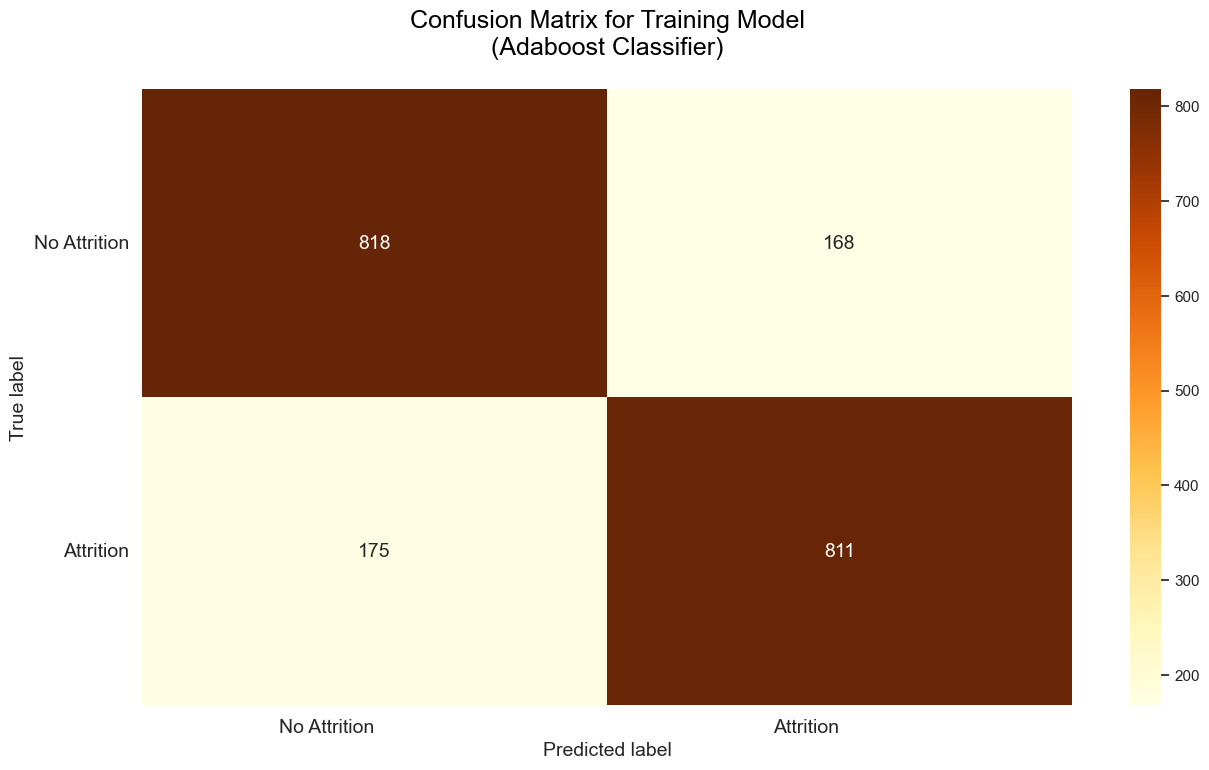

In [188]:
# Form confusion matrix as a dataFrame
confusion_matrix_adaboost = pd.DataFrame((confusion_matrix(y_train, y_train_pred_adaboost)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_adaboost, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Adaboost Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Predict Data Validation

In [96]:
y_val_pred_adaboost = adaboost_model.predict(X_val)
print('Classification Report Validating Model (Adaboost Classifier):')
print(classification_report(y_val, y_val_pred_adaboost))

Classification Report Validating Model (Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       247
           1       0.36      0.66      0.47        47

    accuracy                           0.76       294
   macro avg       0.64      0.72      0.66       294
weighted avg       0.83      0.76      0.78       294



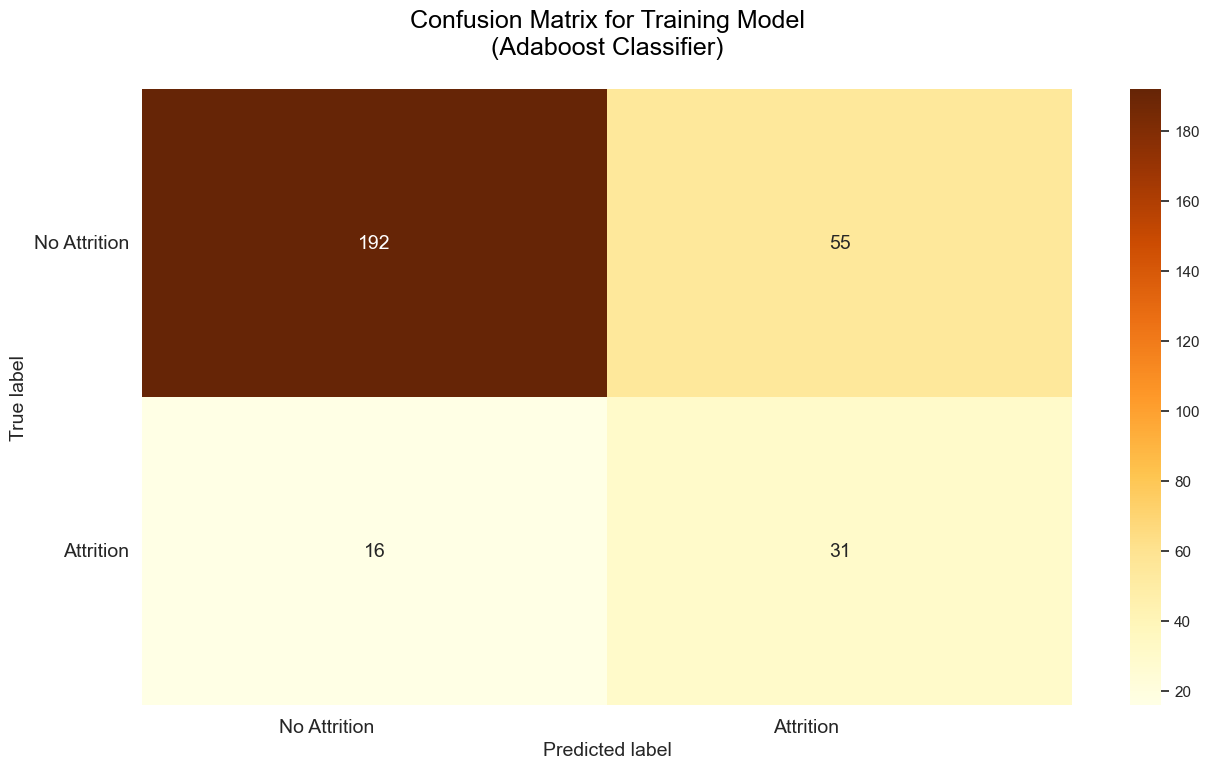

In [97]:
# Form confusion matrix as a dataFrame
confusion_matrix_adaboost = pd.DataFrame((confusion_matrix(y_val, y_val_pred_adaboost)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_adaboost, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Adaboost Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Model Performance

In [101]:
# Recall
recall_train = recall_score(y_train, y_train_pred_adaboost)
print(f'Recall Train: {round(recall_train, 2)}')
recall_val = recall_score(y_val, y_val_pred_adaboost, average='weighted')
print(f'Recall Validation: {round(recall_val, 2)}', end='\n\n')

# Precision
precision_train = precision_score(y_train, y_train_pred_adaboost)
print(f'Precision Train: {round(precision_train, 2)}')
precision_val = precision_score(y_val, y_val_pred_adaboost, average='weighted')
print(f'Precision Validation: {round(precision_val, 2)}', end='\n\n')

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred_adaboost)
print(f'Accuracy Train: {round(accuracy_train, 2)}')
accuracy_val = accuracy_score(y_val, y_val_pred_adaboost)
print(f'Accuracy Validation: {round(accuracy_val, 2)}')

Recall Train: 0.82
Recall Validation: 0.76

Precision Train: 0.83
Precision Validation: 0.83

Accuracy Train: 0.83
Accuracy Validation: 0.76


ROC AUC (Train): 0.83
ROC AUC (Validation): 0.72


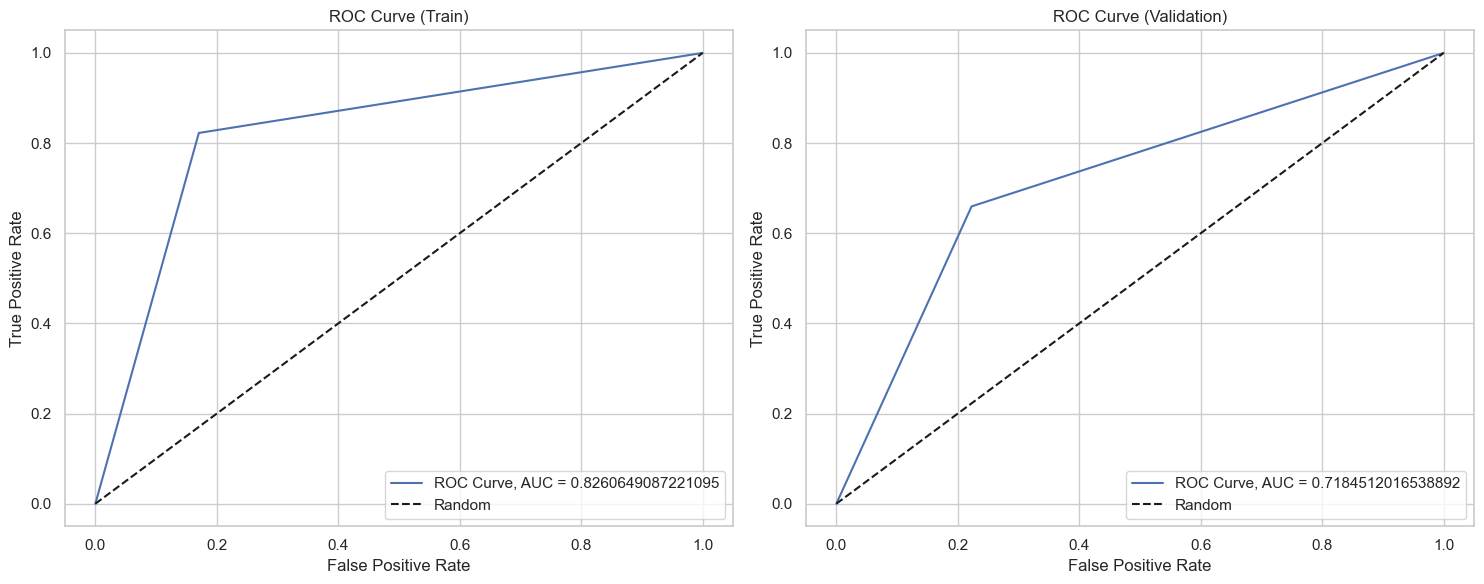

In [99]:
# ROC AUC (Train)
roc_auc_train = roc_auc_score(y_train, y_train_pred_adaboost)
print(f'ROC AUC (Train): {round(roc_auc_train, 2)}')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_adaboost) # ROC Curve (Train)

# ROC AUC (Validation)
roc_auc_val = roc_auc_score(y_val, y_val_pred_adaboost)
print(f'ROC AUC (Validation): {round(roc_auc_val, 2)}')
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_adaboost) # ROC Curve (Validation)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_roc_curve(fpr_train, tpr_train, roc_auc_train, 'ROC Curve (Train)')
plt.subplot(1, 2, 2)
plot_roc_curve(fpr_val, tpr_val, roc_auc_val, 'ROC Curve (Validation)')
plt.tight_layout()
plt.show()

### eXtreme Gradient Boosting (XGBoost) Classifier

In [118]:
xgboost_model = XGBClassifier().fit(X_train, y_train)
print(xgboost_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


#### Predict Data Train

In [119]:
y_train_pred_xgboost = xgboost_model.predict(X_train)
print('Classification Report Training Model (XGboost Classifier):')
print(classification_report(y_train, y_train_pred_xgboost))

Classification Report Training Model (XGboost Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



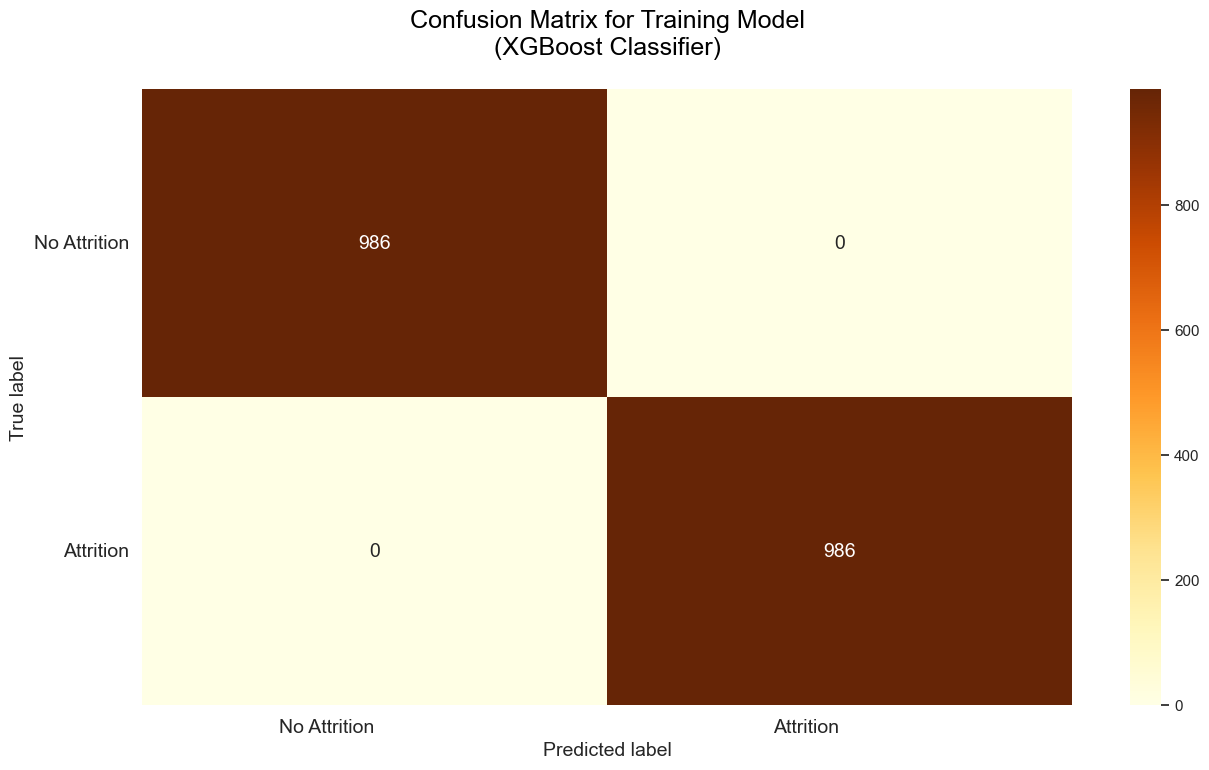

In [120]:
# Form confusion matrix as a dataFrame
confusion_matrix_xgboost = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgboost)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgboost, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Predict Data Validation

In [126]:
y_val_pred_xgboost = xgboost_model.predict(X_val)
print('Classification Report Validating Model (XGBoost Classifier):')
print(classification_report(y_val, y_val_pred_xgboost))

Classification Report Validating Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.42      0.32      0.36        47

    accuracy                           0.82       294
   macro avg       0.65      0.62      0.63       294
weighted avg       0.80      0.82      0.81       294



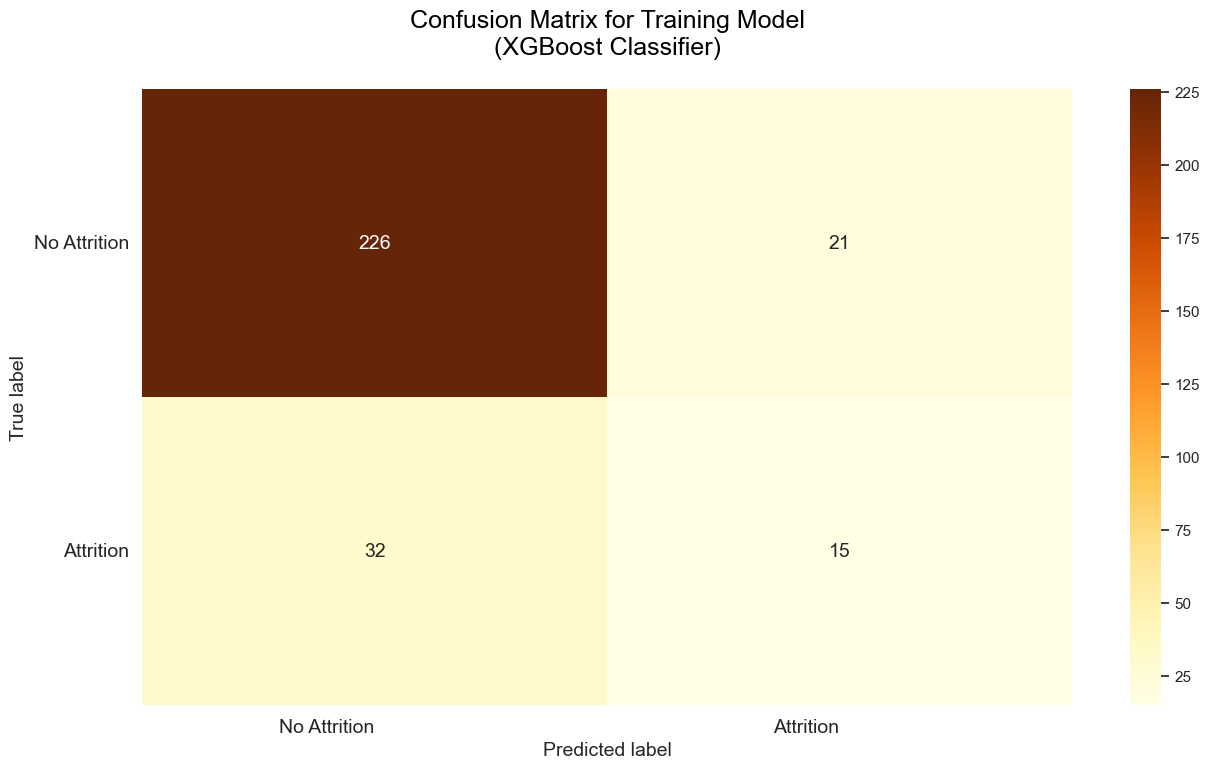

In [127]:
# Form confusion matrix as a dataFrame
confusion_matrix_xgboost = pd.DataFrame((confusion_matrix(y_val, y_val_pred_xgboost)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgboost, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Model Performance

In [128]:
# Recall
recall_train = recall_score(y_train, y_train_pred_xgboost)
print(f'Recall Train: {round(recall_train, 2)}')
recall_val = recall_score(y_val, y_val_pred_xgboost, average='weighted')
print(f'Recall Validation: {round(recall_val, 2)}', end='\n\n')

# Precision
precision_train = precision_score(y_train, y_train_pred_xgboost)
print(f'Precision Train: {round(precision_train, 2)}')
precision_val = precision_score(y_val, y_val_pred_xgboost, average='weighted')
print(f'Precision Validation: {round(precision_val, 2)}', end='\n\n')

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred_xgboost)
print(f'Accuracy Train: {round(accuracy_train, 2)}')
accuracy_val = accuracy_score(y_val, y_val_pred_xgboost)
print(f'Accuracy Validation: {round(accuracy_val, 2)}')

Recall Train: 1.0
Recall Validation: 0.82

Precision Train: 1.0
Precision Validation: 0.8

Accuracy Train: 1.0
Accuracy Validation: 0.82


ROC AUC (Train): 1.0
ROC AUC (Validation): 0.62


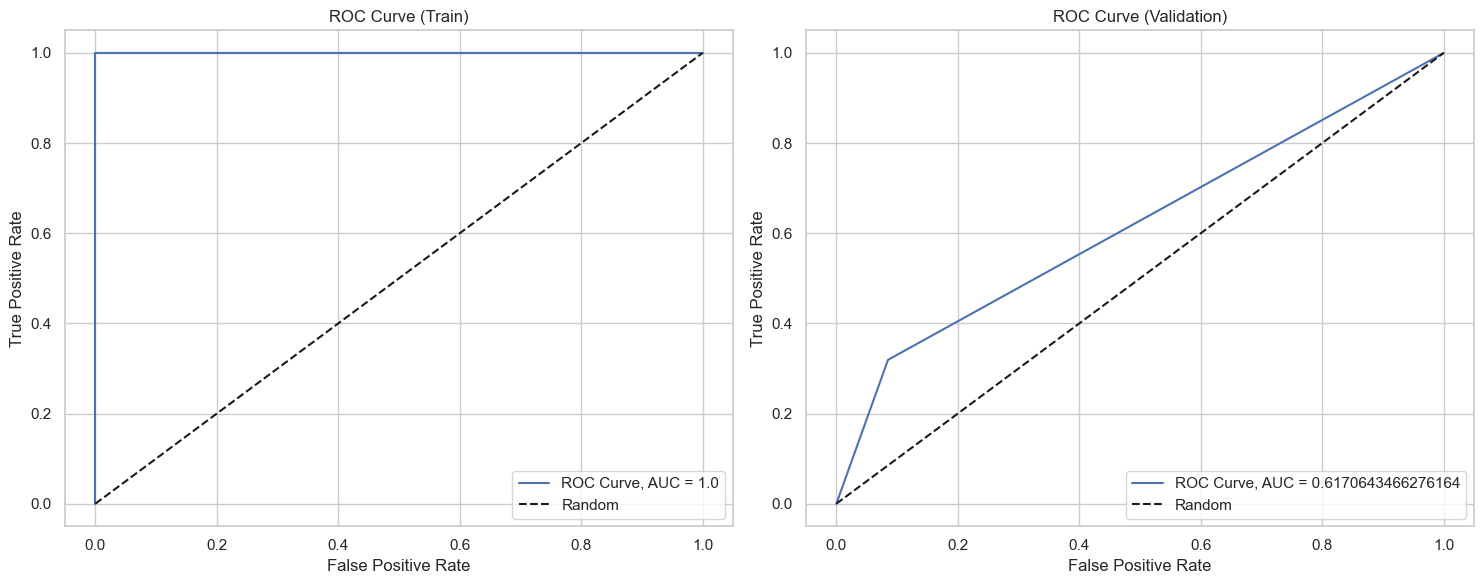

In [129]:
# ROC AUC (Train)
roc_auc_train = roc_auc_score(y_train, y_train_pred_xgboost)
print(f'ROC AUC (Train): {round(roc_auc_train, 2)}')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_xgboost) # ROC Curve (Train)

# ROC AUC (Validation)
roc_auc_val = roc_auc_score(y_val, y_val_pred_xgboost)
print(f'ROC AUC (Validation): {round(roc_auc_val, 2)}')
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_xgboost) # ROC Curve (Validation)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_roc_curve(fpr_train, tpr_train, roc_auc_train, 'ROC Curve (Train)')
plt.subplot(1, 2, 2)
plot_roc_curve(fpr_val, tpr_val, roc_auc_val, 'ROC Curve (Validation)')
plt.tight_layout()
plt.show()

### Gradient Boosting Classifier

In [130]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gb_model)

GradientBoostingClassifier()


#### Predict Data Train

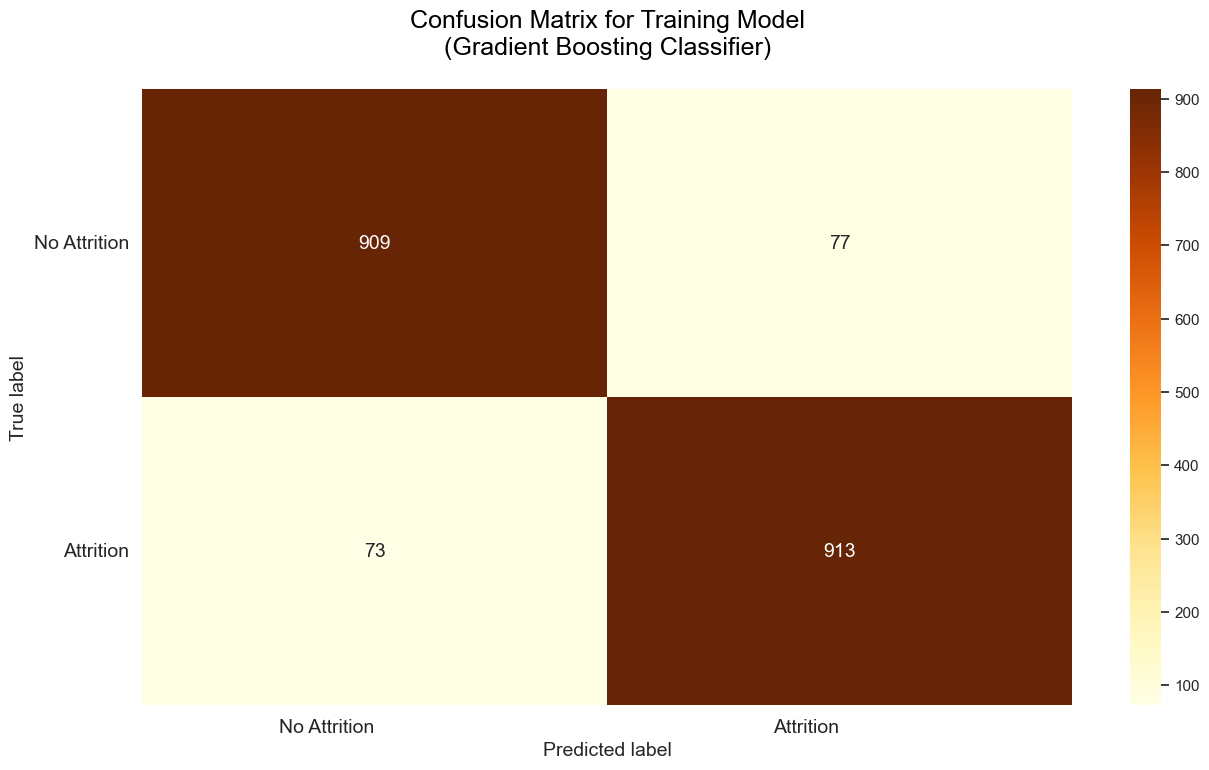

In [133]:
# Form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gb)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [131]:
y_train_pred_gb = gb_model.predict(X_train)
print('Classification Report Training Model (Gradient Boosting Classifier):')
print(classification_report(y_train, y_train_pred_gb))

Classification Report Training Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       986
           1       0.92      0.93      0.92       986

    accuracy                           0.92      1972
   macro avg       0.92      0.92      0.92      1972
weighted avg       0.92      0.92      0.92      1972



#### Predict Data Validation

In [134]:
y_val_pred_gb = gb_model.predict(X_val)
print('Classification Report Validating Model (Gradient Boosting Classifier):')
print(classification_report(y_val, y_val_pred_gb))

Classification Report Validating Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       247
           1       0.37      0.53      0.43        47

    accuracy                           0.78       294
   macro avg       0.64      0.68      0.65       294
weighted avg       0.82      0.78      0.79       294



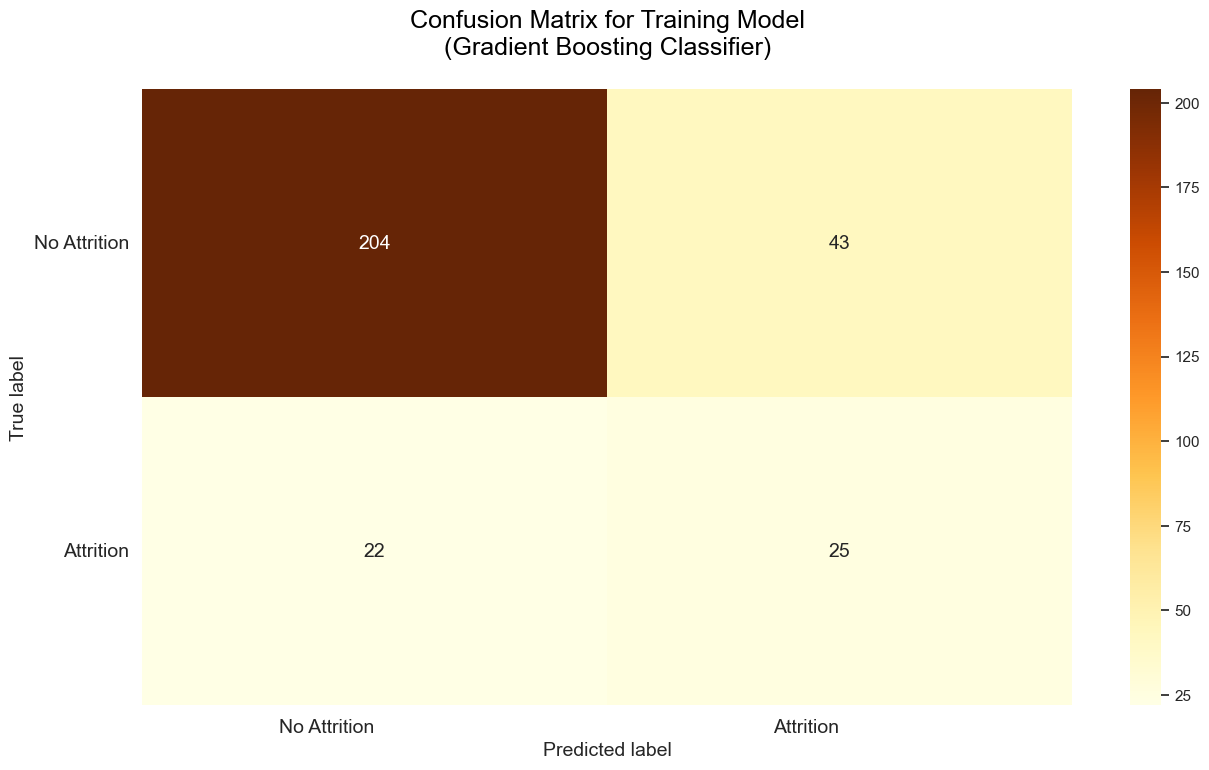

In [135]:
# Form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_val, y_val_pred_gb)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Model Performance

In [136]:
# Recall
recall_train = recall_score(y_train, y_train_pred_gb)
print(f'Recall Train: {round(recall_train, 2)}')
recall_val = recall_score(y_val, y_val_pred_gb, average='weighted')
print(f'Recall Validation: {round(recall_val, 2)}', end='\n\n')

# Precision
precision_train = precision_score(y_train, y_train_pred_gb)
print(f'Precision Train: {round(precision_train, 2)}')
precision_val = precision_score(y_val, y_val_pred_gb, average='weighted')
print(f'Precision Validation: {round(precision_val, 2)}', end='\n\n')

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred_gb)
print(f'Accuracy Train: {round(accuracy_train, 2)}')
accuracy_val = accuracy_score(y_val, y_val_pred_gb)
print(f'Accuracy Validation: {round(accuracy_val, 2)}')

Recall Train: 0.93
Recall Validation: 0.78

Precision Train: 0.92
Precision Validation: 0.82

Accuracy Train: 0.92
Accuracy Validation: 0.78


ROC AUC (Train): 0.92
ROC AUC (Validation): 0.68


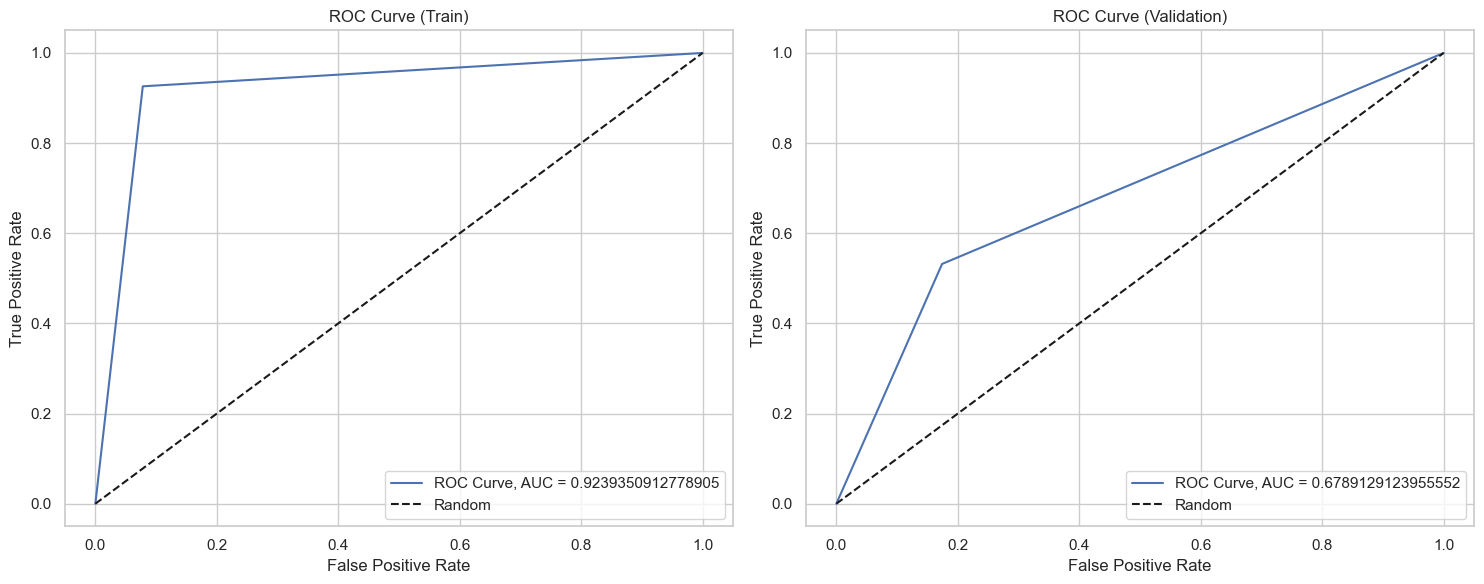

In [137]:
# ROC AUC (Train)
roc_auc_train = roc_auc_score(y_train, y_train_pred_gb)
print(f'ROC AUC (Train): {round(roc_auc_train, 2)}')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_gb) # ROC Curve (Train)

# ROC AUC (Validation)
roc_auc_val = roc_auc_score(y_val, y_val_pred_gb)
print(f'ROC AUC (Validation): {round(roc_auc_val, 2)}')
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_gb) # ROC Curve (Validation)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_roc_curve(fpr_train, tpr_train, roc_auc_train, 'ROC Curve (Train)')
plt.subplot(1, 2, 2)
plot_roc_curve(fpr_val, tpr_val, roc_auc_val, 'ROC Curve (Validation)')
plt.tight_layout()
plt.show()

### Each Model's Performance

In [2]:
data = [["Adaboost Classifier", 0.82, 0.76, 0.83, 0.83, 0.83, 0.76, 0.83, 0.72], 
        ["Decision Tree", 1.0, 0.77, 1.0, 0.76, 1.0, 0.77, 1.0, 0.56], 
        ["Gradient Boosting Classifier", 0.93, 0.78, 0.92, 0.82, 0.92, 0.78, 0.92, 0.68],
        ["Random Forest", 1.0, 0.81, 1.0, 0.78, 1.0, 0.81, 1.0, 0.58],
        ["XGBoost Classifier", 1.0, 0.82, 1.0, 0.8, 1.0, 0.82, 1.0, 0.62]]

columns = ['Models', 'Recall (Train)', 'Recall (Val)', 'Precision (Train)', 'Precision (Val)', 'Accuracy (Train)', 'Accuracy (Val)', 'ROC AUC (Train)', 'ROC AUC (Val)']

results = pd.DataFrame(data, columns=columns)
# results = results.reset_index(drop=True)  # Reset the index
results.sort_values(by=['Models']).style.background_gradient(cmap='YlOrBr')

**Summary:** 
The model with the best and consistently good performance is the `Adaboost Classifier`, while the other four models show indications of overfitting as they only perform well on their training data. As for the Adaboost Classifier, hyperparameter tuning will be conducted to further optimize its performance on the validation set.

### Hyperparameter Tuning

Hyperparameter tuning is performed on the best model, which is the Adaboost Classifier, using the `Grid Search` and `Random Search` methods.

#### Grid Search

In [105]:
adaboost_model_grid = AdaBoostClassifier() 

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create a GridSearchCV object with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=adaboost_model_grid,
    param_grid=param_grid,
    scoring={'Recall': make_scorer(recall_score)},
    cv=5,
    refit='Recall'
)

grid_search.fit(X_train, y_train) # Fit the model to the training data
print("Best parameters:", grid_search.best_params_)
best_adaboost_model_grid = grid_search.best_estimator_ # Create an Adaboost model with the best parameters

# Predict on the training and validation data
y_train_pred_adaboost_grid = best_adaboost_model_grid.predict(X_train)
y_val_pred_adaboost_grid = best_adaboost_model_grid.predict(X_val)

# Display the classification report for the training data
print('Classification Report Training Model (Tuned Adaboost Classifier):')
print(classification_report(y_train, y_train_pred_adaboost_grid))

# Display the classification report for the validation data
print('Classification Report Validating Model (Tuned Adaboost Classifier):')
print(classification_report(y_val, y_val_pred_adaboost_grid))

Best parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Classification Report Training Model (Tuned Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       986
           1       0.88      0.90      0.89       986

    accuracy                           0.89      1972
   macro avg       0.89      0.89      0.89      1972
weighted avg       0.89      0.89      0.89      1972

Classification Report Validating Model (Tuned Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       247
           1       0.37      0.62      0.46        47

    accuracy                           0.77       294
   macro avg       0.64      0.71      0.66       294
weighted avg       0.83      0.77      0.79       294



In [108]:
# Recall
recall_train = recall_score(y_train, y_train_pred_adaboost_grid)
print(f'Recall Train: {round(recall_train, 2)}')
recall_val = recall_score(y_val, y_val_pred_adaboost_grid, average='weighted')
print(f'Recall Validation: {round(recall_val, 2)}', end='\n\n')

# Precision
precision_train = precision_score(y_train, y_train_pred_adaboost_grid)
print(f'Precision Train: {round(precision_train, 2)}')
precision_val = precision_score(y_val, y_val_pred_adaboost_grid, average='weighted')
print(f'Precision Validation: {round(precision_val, 2)}', end='\n\n')

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred_adaboost_grid)
print(f'Accuracy Train: {round(accuracy_train, 2)}')
accuracy_val = accuracy_score(y_val, y_val_pred_adaboost_grid)
print(f'Accuracy Validation: {round(accuracy_val, 2)}')

Recall Train: 0.9
Recall Validation: 0.77

Precision Train: 0.88
Precision Validation: 0.83

Accuracy Train: 0.89
Accuracy Validation: 0.77


#### Random Search

In [109]:
adaboost_model_random = AdaBoostClassifier()

param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0)
}

random_search = RandomizedSearchCV(
    estimator=adaboost_model_random,
    param_distributions=param_dist,
    scoring={'Recall': make_scorer(recall_score)},
    n_iter=10,  # Number of random combinations to try
    cv=5,
    refit='Recall',
    random_state=42
)

random_search.fit(X_train, y_train) # Fit the model to the training data
print("Best parameters:", random_search.best_params_) # Create an Adaboost model with the best parameters
best_adaboost_model_random = random_search.best_estimator_

# Predict on the training and validation data
y_train_pred_adaboost_random = best_adaboost_model_random.predict(X_train)
y_val_pred_adaboost_random = best_adaboost_model_random.predict(X_val)

# Display the classification report for the training data
print('Classification Report Training Model (Randomized Adaboost Classifier):')
print(classification_report(y_train, y_train_pred_adaboost_random))

# Display the classification report for the validation data
print('Classification Report Validating Model (Randomized Adaboost Classifier):')
print(classification_report(y_val, y_val_pred_adaboost_random))

Best parameters: {'learning_rate': 0.6111150117432088, 'n_estimators': 180}
Classification Report Training Model (Randomized Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       986
           1       0.86      0.87      0.87       986

    accuracy                           0.87      1972
   macro avg       0.87      0.87      0.87      1972
weighted avg       0.87      0.87      0.87      1972

Classification Report Validating Model (Randomized Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       247
           1       0.38      0.64      0.47        47

    accuracy                           0.77       294
   macro avg       0.65      0.72      0.66       294
weighted avg       0.83      0.77      0.79       294



In [110]:
# Recall
recall_train = recall_score(y_train, y_train_pred_adaboost_random)
print(f'Recall Train: {round(recall_train, 2)}')
recall_val = recall_score(y_val, y_val_pred_adaboost_random, average='weighted')
print(f'Recall Validation: {round(recall_val, 2)}', end='\n\n')

# Precision
precision_train = precision_score(y_train, y_train_pred_adaboost_random)
print(f'Precision Train: {round(precision_train, 2)}')
precision_val = precision_score(y_val, y_val_pred_adaboost_random, average='weighted')
print(f'Precision Validation: {round(precision_val, 2)}', end='\n\n')

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred_adaboost_random)
print(f'Accuracy Train: {round(accuracy_train, 2)}')
accuracy_val = accuracy_score(y_val, y_val_pred_adaboost_random)
print(f'Accuracy Validation: {round(accuracy_val, 2)}')

Recall Train: 0.87
Recall Validation: 0.77

Precision Train: 0.86
Precision Validation: 0.83

Accuracy Train: 0.87
Accuracy Validation: 0.77


#### Adaboost Classifier Performance Before and After Tuning

In [4]:
tuning_data = [["Before Tuning", 0.82, 0.76, 0.83, 0.83, 0.83, 0.76], 
               ["Tuning using GridSearch", 0.9, 0.77, 0.88, 0.83, 0.89, 0.77], 
               ["Tuning using RandomSearch", 0.87, 0.77, 0.86, 0.83, 0.87, 0.77]]

columns = ['Models', 'Recall (Train)', 'Recall (Val)', 'Precision (Train)', 'Precision (Val)', 'Accuracy (Train)', 'Accuracy (Val)']

results = pd.DataFrame(tuning_data, columns=columns)
# results = results.reset_index(drop=True)  # Reset the index
results.sort_values(by=['Models']).style.background_gradient(cmap='YlOrBr')

**Summary:**
Since the metrics on the validation data were measured using the `average='weighted'` parameter, the model selection process will take into account the instances of False Negatives generated by the Adaboost Classifier, both before and after tuning.

#### Testing Adaboost Classifier on Test Data Before Tuning.

In [102]:
y_test_pred_adaboost = adaboost_model.predict(X_test)
print('Classification Report Testing Model (Adaboost Classifier):')
print(classification_report(y_test, y_test_pred_adaboost))

Classification Report Testing Model (Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1233
           1       0.45      0.76      0.56       237

    accuracy                           0.81      1470
   macro avg       0.70      0.79      0.72      1470
weighted avg       0.87      0.81      0.83      1470



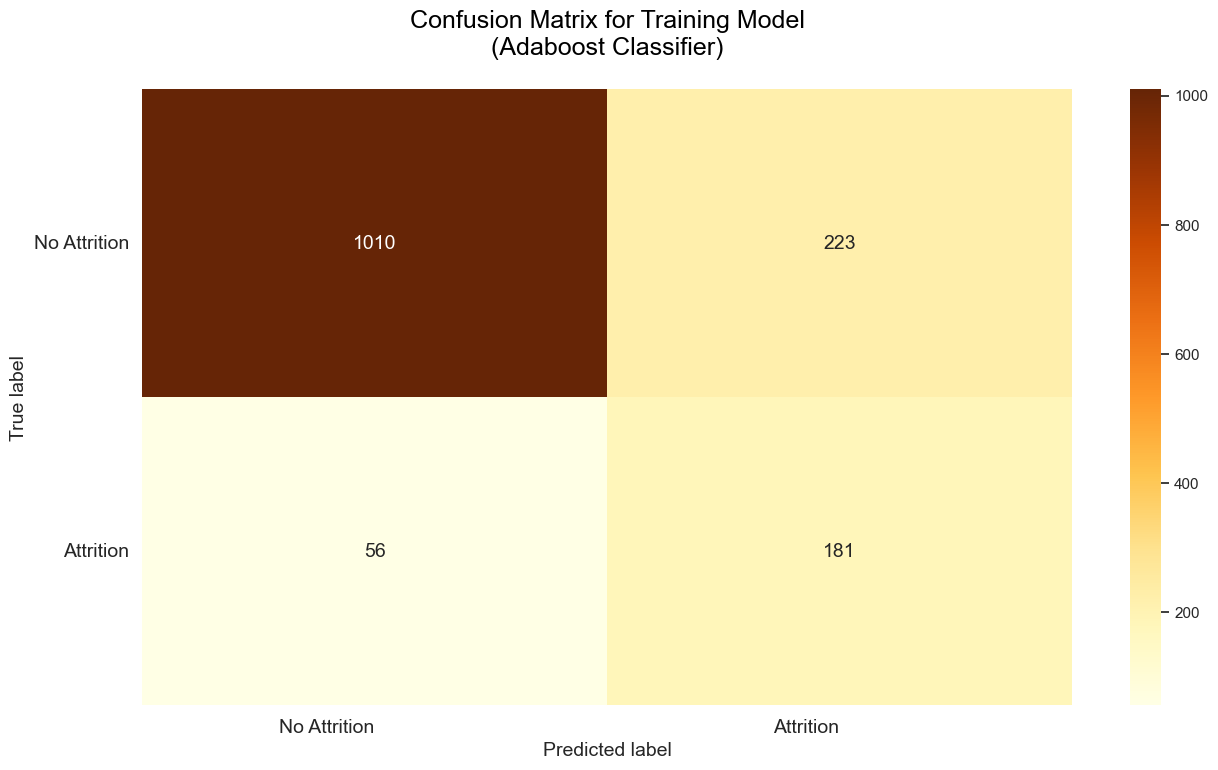

In [103]:
# Form confusion matrix as a dataFrame
confusion_matrix_adaboost = pd.DataFrame((confusion_matrix(y_test, y_test_pred_adaboost)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_adaboost, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Adaboost Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Testing Adaboost Classifier on Test Data After Tuning using GridSearch

In [106]:
best_adaboost_model_grid = AdaBoostClassifier(learning_rate=1.0, n_estimators=200) # Create an Adaboost model with the best parameters
best_adaboost_model_grid.fit(X_train, y_train) # Fit the model to the training data
y_test_pred_adaboost_ht = best_adaboost_model_grid.predict(X_test) # Predict on the test data

# Display the classification report for the test data
print('Classification Report Testing Model (Tuned Adaboost Classifier):')
print(classification_report(y_test, y_test_pred_adaboost_ht))

Classification Report Testing Model (Tuned Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1233
           1       0.53      0.80      0.64       237

    accuracy                           0.86      1470
   macro avg       0.75      0.83      0.78      1470
weighted avg       0.89      0.86      0.87      1470



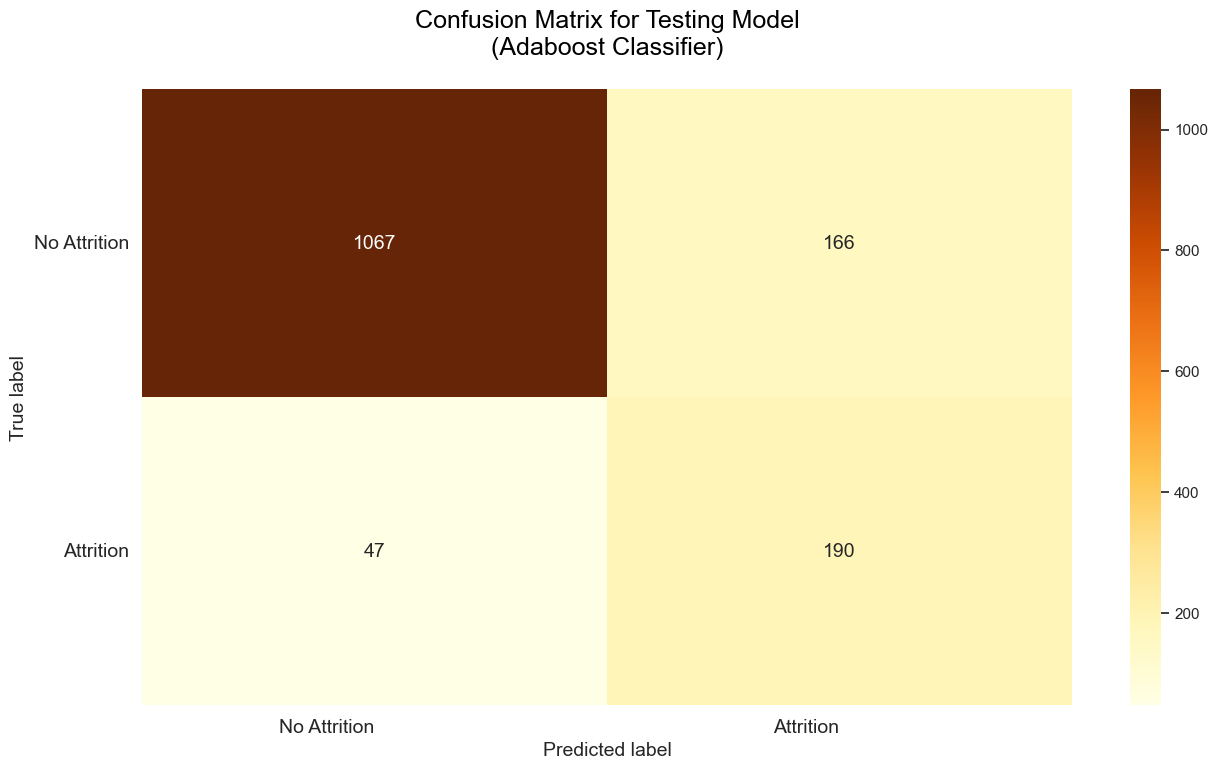

In [107]:
# Form confusion matrix as a dataFrame
confusion_matrix_adaboost_grid = pd.DataFrame((confusion_matrix(y_test, y_test_pred_adaboost_ht)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_adaboost_grid, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Adaboost Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Testing Adaboost Classifier on Test Data After Tuning using RandomSearch

In [114]:
# Create an Adaboost model with the best parameters
adaboost_model_ht_random = AdaBoostClassifier(learning_rate=0.6111150117432088, n_estimators=180)

# Fit the model to the training data
adaboost_model_ht_random.fit(X_train, y_train)

# Predict on the test data
y_test_pred_adaboost_ht_random = adaboost_model_ht_random.predict(X_test)

# Display the classification report for the test data
print('Classification Report Testing Model (Tuned Adaboost Classifier):')
print(classification_report(y_test, y_test_pred_adaboost_ht_random))

Classification Report Testing Model (Tuned Adaboost Classifier):
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1233
           1       0.50      0.79      0.61       237

    accuracy                           0.84      1470
   macro avg       0.73      0.82      0.76      1470
weighted avg       0.88      0.84      0.85      1470



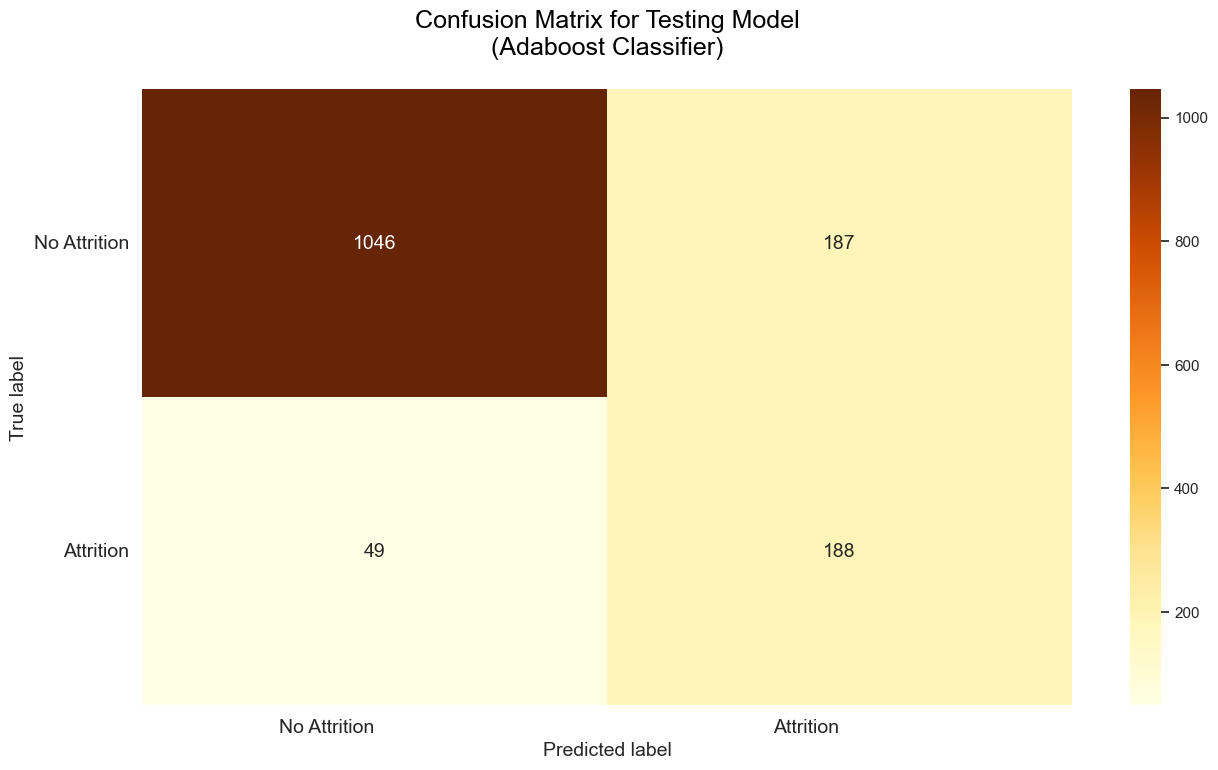

In [115]:
# Form confusion matrix as a dataFrame
confusion_matrix_adaboost_ht_random = pd.DataFrame((confusion_matrix(y_test, y_test_pred_adaboost_ht_random)), ('No Attrition', 'Attrition'), ('No Attrition', 'Attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_adaboost_ht_random, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrBr')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Adaboost Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Summary:**
- <b>Adaboost Classifier After Tuning using GridSearch</b> exhibits the lowest cases of False Negatives (predicting No Attrition but actual Attrition), making it the selected model. The choice is based on the reduced occurrence of False Negatives, which will minimize the costs associated with hiring new employees for the company.

### Feature Importance

In [124]:
def shap_plot(model, model_name, data=None):

    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)

    tree = ["Decision Tree", "Random Forest", "XGBoost Classifier", "Gradient Boosting Classifier"]

    shap.initjs()

    if model_name in tree:

        if model_name in ["XGBoost Classifier", "Gradient Boosting Classifier"] :
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)
            expected = explainer.expected_value
        else:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)[1]
            expected = explainer.expected_value[1]


        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values, data, show = False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout()
        plt.show()

        return shap.force_plot(expected, shap_values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

    else :
        explainer = shap.Explainer(model.predict, data)
        shap_values = explainer(data)

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values.values, data, show = False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values.values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout()
        plt.show()

        return shap.force_plot(shap_values.base_values[0], shap_values.values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

Permutation explainer: 1973it [1:47:12,  3.26s/it]                          


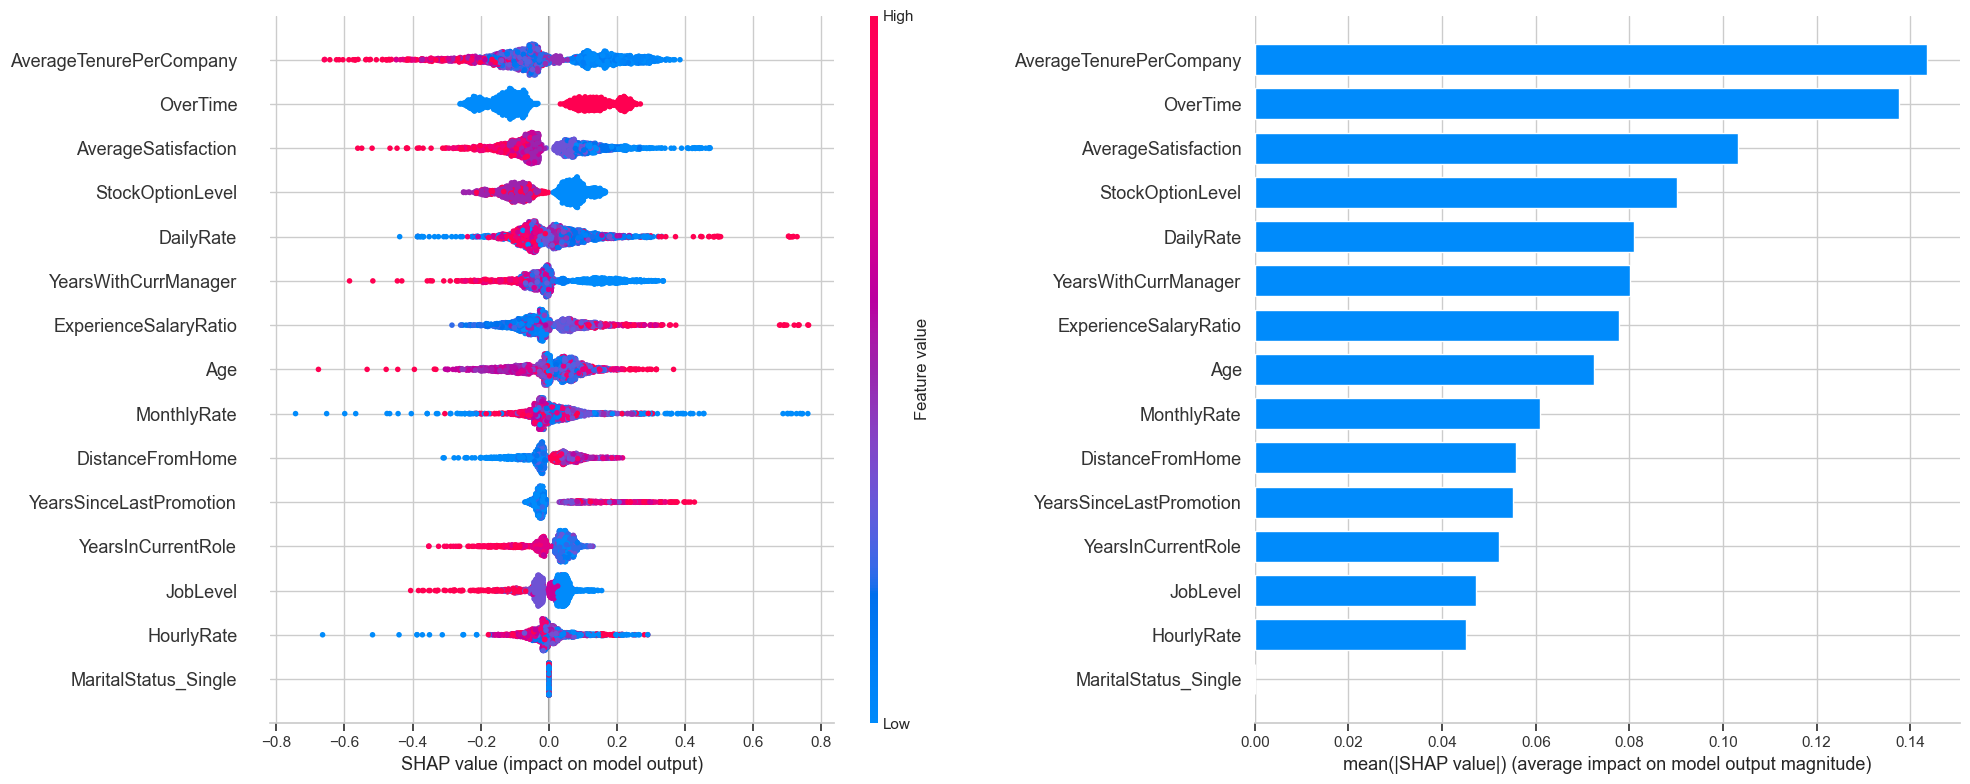

In [125]:
shap_plot(best_adaboost_model, "Adaboost Classifier", X_train)

**Summary:**  
The five most influential features on employee attrition are `AverageTenurePerCompany`, `OverTime`, `AverageSatisfaction`, `StockOptionLevel`, and `DailyRate`.
- AverageTenurePerCompany has a positive indication leaning left. This indicates a negative correlation between AverageTenurePerCompany and the target variable (Attrition), meaning that the <b>shorter the average duration of employment for employees at each previous company, the higher the likelihood of attrition</b>.
- OverTime has a positive indication leaning right. This shows a positive correlation between OverTime and the target variable (Attrition), suggesting that <b>if an employee works overtime, the likelihood of attrition increases</b>.
- AverageSatisfaction has a positive indication leaning left. This signifies a negative correlation between AverageSatisfaction and the target variable (Attrition), meaning that as <b>employee satisfaction decreases, the likelihood of attrition increases</b>.
- StockOptionLevel has a positive indication leaning left. This indicates a negative correlation between StockOptionLevel and the target variable (Attrition), suggesting that the <b>fewer stock options an employee has, the higher the likelihood of attrition</b>.
- DailyRate has a positive indication leaning left. This suggests a negative correlation between DailyRate and the target variable (Attrition), meaning that the <b>lower the daily income an employee receives, the higher the likelihood of attrition</b>. However, it is worth noting that there are instances of attrition even with a high daily rate.

### Recommendations
- Considering AverageTenurePerCompany in Recruitment
> During the recruitment process, take into account the AverageTenurePerCompany. If prospective employees have a history of frequent company switches and short job durations, inquire about the reasons behind it. This ensures that when hiring such individuals, the company is aware of their expectations, facilitating a better match and potentially reducing turnover.
- Reevaluating Employee Working Hours
> Consider reassessing employee working hours by potentially implementing a maximum overtime limit, such as not exceeding 80 hours per week. Alternatively, provide additional compensation if employees work more than 80 hours per week.
- Listening to Employee Input and Concerns
> Actively listen to employees' input and concerns to comprehend issues that may lead to resignations. Subsequently, take corrective actions based on the feedback received. This strategy is geared towards reducing the attrition rate and enhancing overall employee satisfaction within the company.
- Evaluating Stock Distribution and Daily Income Systems
> Conduct an evaluation of the company's stock distribution and daily income systems to ensure their alignment with the contributions made by employees to the company. Identify areas that may require improvement and enhancement.